### Conditional Dual VAE
Categorical CoDVAE trained to reconstruct the mask image

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow_addons.optimizers import AdamW

In [3]:
os.environ['TF_GPU_THREAD_MODE'] = 'gpu_private'

In [4]:
import ad

from ad import utils
from ad.models import COD2VAE

In [5]:
utils.set_random_seed(42)
ad.plot.set_style(default_cmap=ad.plot.CMAP2)

Random seed 42 set.


In [6]:
%load_ext autoreload
%autoreload 2

Data

In [7]:
train = utils.read_npz(folder='data/n_tracks/train', dtype=np.float32,
                       keep='qcd', verbose=False,
                       shuffle=True, keys=['images', 'labels', 'masses'])
utils.free_mem()

# mask image
train['trk_mask'] = (train['images'][..., 0, np.newaxis] > 0.0).astype(np.float32)

Model definition

In [8]:
vae = COD2VAE(image_shape=(72, 58, 1), latent_size=64, tau=1.0,
              large_encoder=dict(depths=(1, 1, 1, 1), filters=[64, 128, 128, 256],
                                 groups=4, kernel_initializer='he_uniform'),
              mask_encoder=dict(filters=[64, 128, 128, 256], groups=2,
                                kernel_initializer='he_uniform'),
              decoder=dict(filters=[256, 128, 128, 64], depths=(1, 1, 1, 1),
                           bias=-1.0, groups=4, kernel_initializer='he_uniform'))
vae.summary()

Model: "Mask-Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mask_image (InputLayer)     [(None, 72, 58, 1)]       0         
                                                                 
 conv-b0 (ConvLayer)         (None, 72, 58, 64)        768       
                                                                 
 max_pool-b0 (MaxPooling2D)  (None, 36, 29, 64)        0         
                                                                 
 conv-b1 (ConvLayer)         (None, 36, 29, 128)       37248     
                                                                 
 max_pool-b1 (MaxPooling2D)  (None, 18, 15, 128)       0         
                                                                 
 conv-b2 (ConvLayer)         (None, 18, 15, 128)       74112     
                                                                 
 max_pool-b2 (MaxPooling2D)  (None, 9, 8, 128)        

In [18]:
vae.compile(optimizer=AdamW(weight_decay=1e-4, clipnorm=1.0))

checkpoint = utils.get_checkpoint(path='categorical_codvae', monitor='val_ssim',
                                  mode='max', best_only=True)

plot = ad.callbacks.PlotCallback(path=None, data=train['trk_mask'],
                                 amount=5, freq=10,
                                 cmap=ad.plot.CMAP3, v_max=1.0)

Epoch 1/100
267/267 [==============================] - ETA: 0s - loss: 525.7874 - mse: 281.9849 - psnr: 13.2284 - ssim: 0.2529 - tau: 1.2736 - kl_loss: 20.1618 - reco_loss: 505.6255 - true_energy: 81.2595 - pred_energy: 213.9768 - grads_norm: 872.6232 - weights_norm: 217.0962

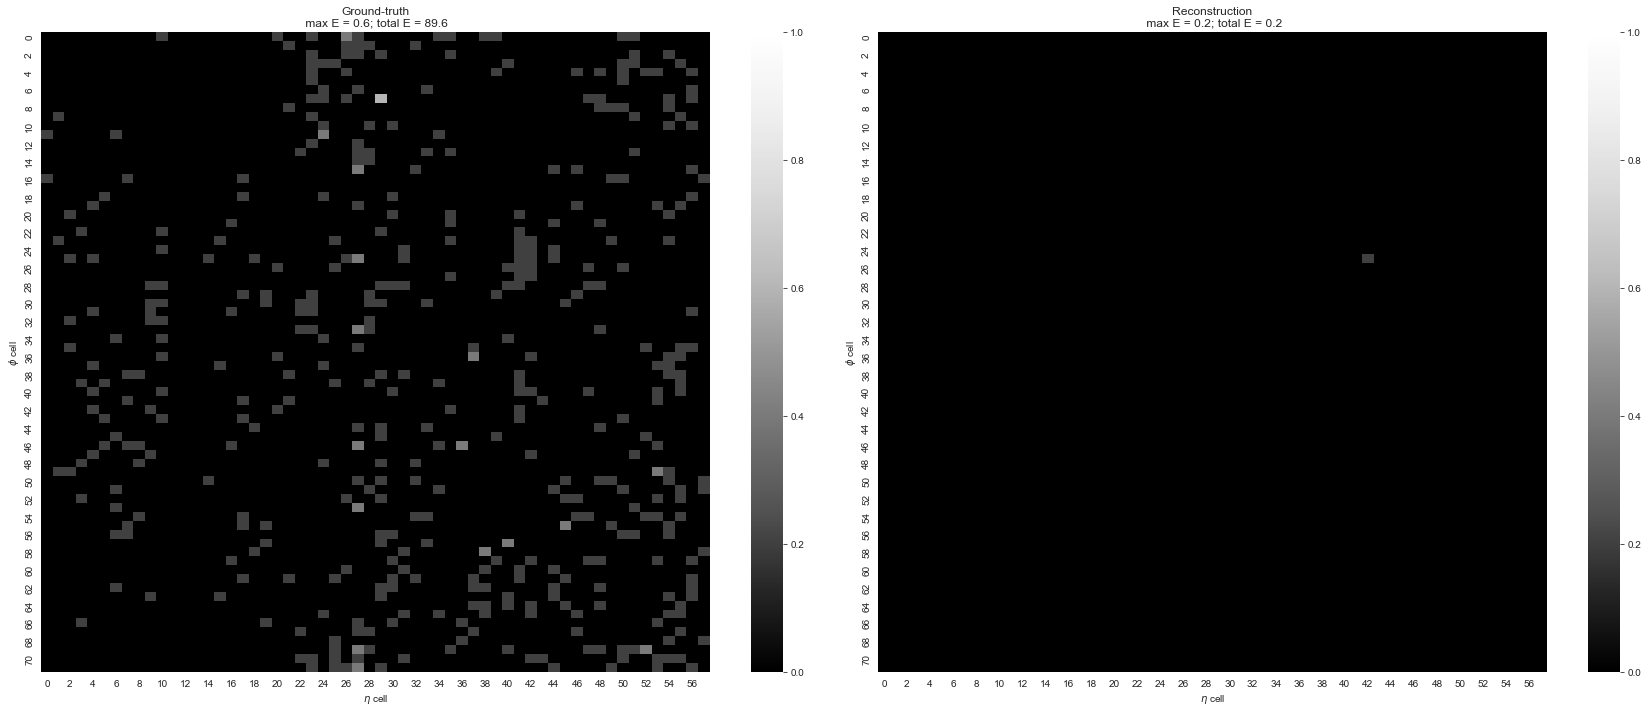

267/267 [==============================] - 246s 788ms/step - loss: 525.2853 - mse: 281.6015 - psnr: 13.2324 - ssim: 0.2531 - tau: 1.2732 - kl_loss: 20.1354 - reco_loss: 505.1498 - true_energy: 81.2586 - pred_energy: 213.5893 - grads_norm: 870.2962 - weights_norm: 217.0905 - val_loss: 382.5382 - val_mse: 159.6732 - val_psnr: 14.9126 - val_ssim: 0.3552 - val_tau: 1.1457 - val_kl_loss: 12.0445 - val_reco_loss: 370.4936 - val_true_energy: 81.1814 - val_pred_energy: 88.1022
Epoch 2/100
267/267 [==============================] - 193s 721ms/step - loss: 371.6475 - mse: 156.6565 - psnr: 14.8660 - ssim: 0.3568 - tau: 1.1467 - kl_loss: 11.0436 - reco_loss: 360.6037 - true_energy: 81.1295 - pred_energy: 86.2624 - grads_norm: 191.6677 - weights_norm: 214.1660 - val_loss: 361.5982 - val_mse: 147.3085 - val_psnr: 15.0899 - val_ssim: 0.3742 - val_tau: 1.1636 - val_kl_loss: 10.5215 - val_reco_loss: 351.0766 - val_true_energy: 81.1814 - val_pred_energy: 76.6624
Epoch 3/100
267/267 [====================

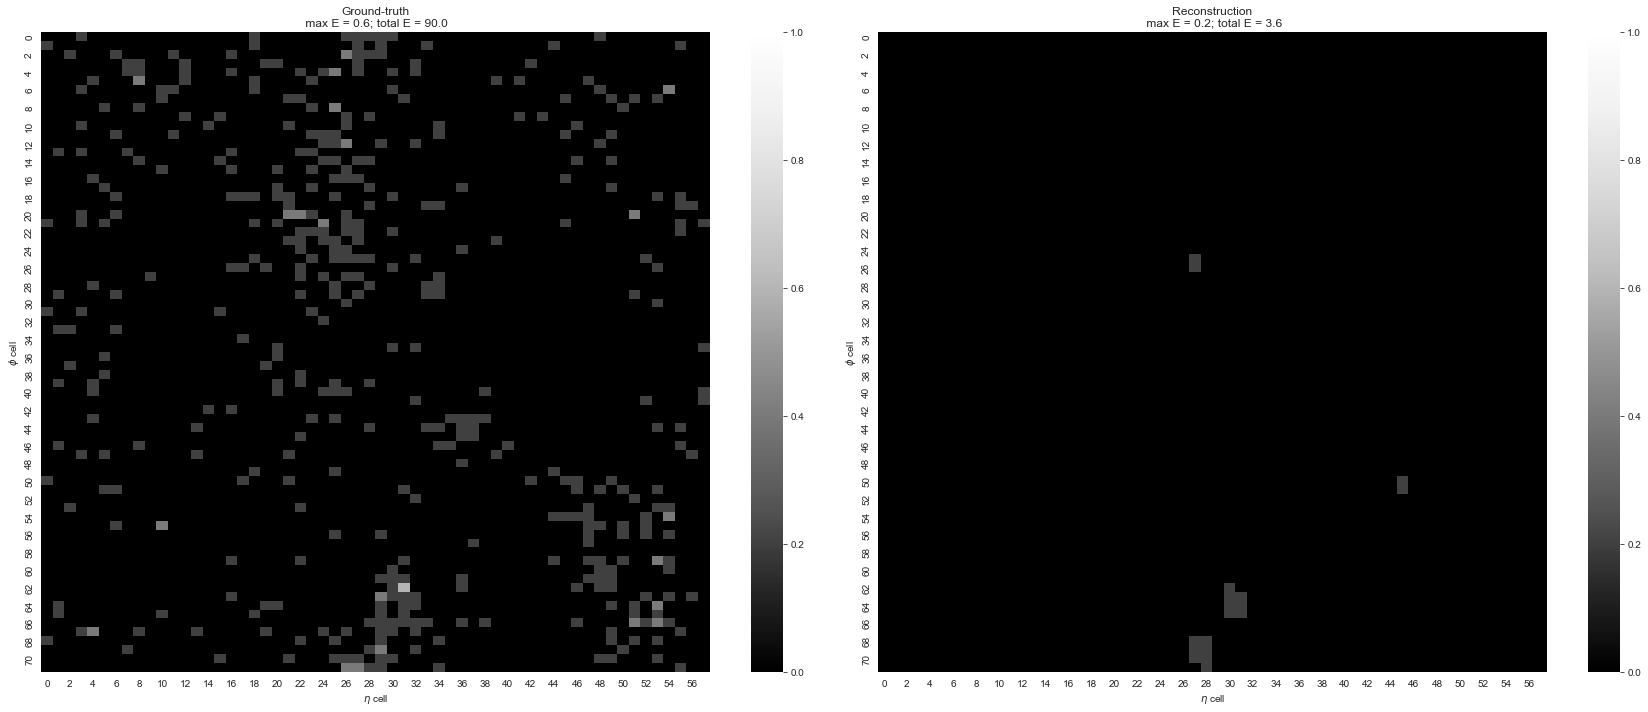

267/267 [==============================] - 197s 738ms/step - loss: 325.7539 - mse: 134.9493 - psnr: 15.3111 - ssim: 0.4238 - tau: 1.5157 - kl_loss: 14.2309 - reco_loss: 311.5226 - true_energy: 81.1778 - pred_energy: 68.4275 - grads_norm: 94.1137 - weights_norm: 191.6191 - val_loss: 324.7075 - val_mse: 134.2148 - val_psnr: 15.3364 - val_ssim: 0.4258 - val_tau: 1.5371 - val_kl_loss: 14.4746 - val_reco_loss: 310.2322 - val_true_energy: 81.1814 - val_pred_energy: 67.7307
Epoch 12/100
267/267 [==============================] - 196s 733ms/step - loss: 323.9606 - mse: 134.4694 - psnr: 15.3238 - ssim: 0.4261 - tau: 1.5512 - kl_loss: 14.6038 - reco_loss: 309.3562 - true_energy: 81.1708 - pred_energy: 68.1977 - grads_norm: 96.5216 - weights_norm: 189.3399 - val_loss: 323.0338 - val_mse: 133.8130 - val_psnr: 15.3465 - val_ssim: 0.4278 - val_tau: 1.5715 - val_kl_loss: 14.8414 - val_reco_loss: 308.1919 - val_true_energy: 81.1813 - val_pred_energy: 67.5739
Epoch 13/100
267/267 [=====================

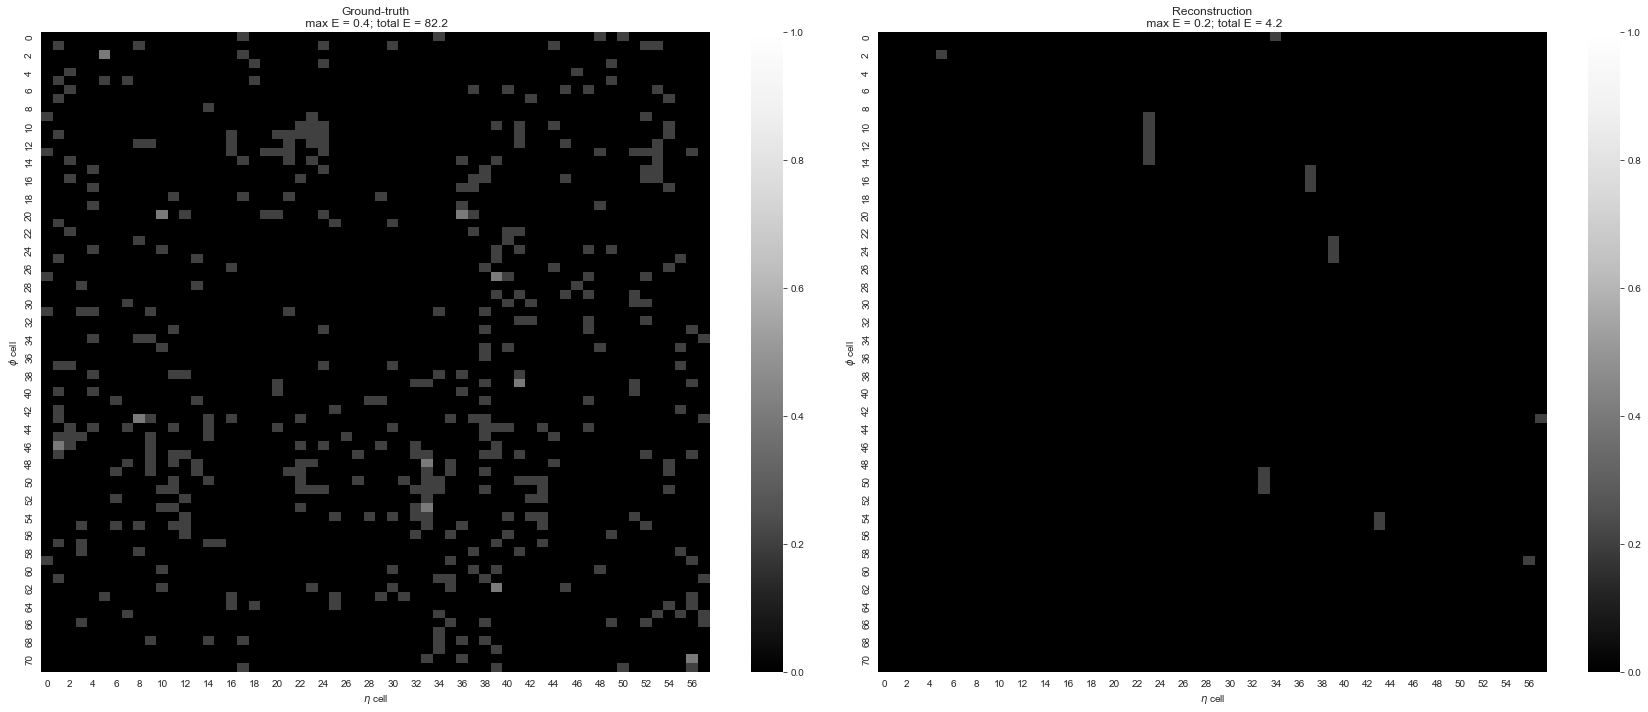

267/267 [==============================] - 195s 731ms/step - loss: 312.8745 - mse: 131.6335 - psnr: 15.4048 - ssim: 0.4399 - tau: 1.8169 - kl_loss: 17.7892 - reco_loss: 295.0854 - true_energy: 81.1804 - pred_energy: 67.1807 - grads_norm: 136.5288 - weights_norm: 171.7364 - val_loss: 312.1692 - val_mse: 131.2372 - val_psnr: 15.4193 - val_ssim: 0.4411 - val_tau: 1.8346 - val_kl_loss: 18.0513 - val_reco_loss: 294.1181 - val_true_energy: 81.1815 - val_pred_energy: 66.8608
Epoch 22/100
267/267 [==============================] - 195s 732ms/step - loss: 311.6327 - mse: 131.3134 - psnr: 15.4151 - ssim: 0.4416 - tau: 1.8471 - kl_loss: 18.2100 - reco_loss: 293.4230 - true_energy: 81.1787 - pred_energy: 67.1270 - grads_norm: 139.7419 - weights_norm: 170.1206 - val_loss: 310.8552 - val_mse: 130.9068 - val_psnr: 15.4301 - val_ssim: 0.4429 - val_tau: 1.8665 - val_kl_loss: 18.4979 - val_reco_loss: 292.3573 - val_true_energy: 81.1815 - val_pred_energy: 66.8315
Epoch 23/100
267/267 [===================

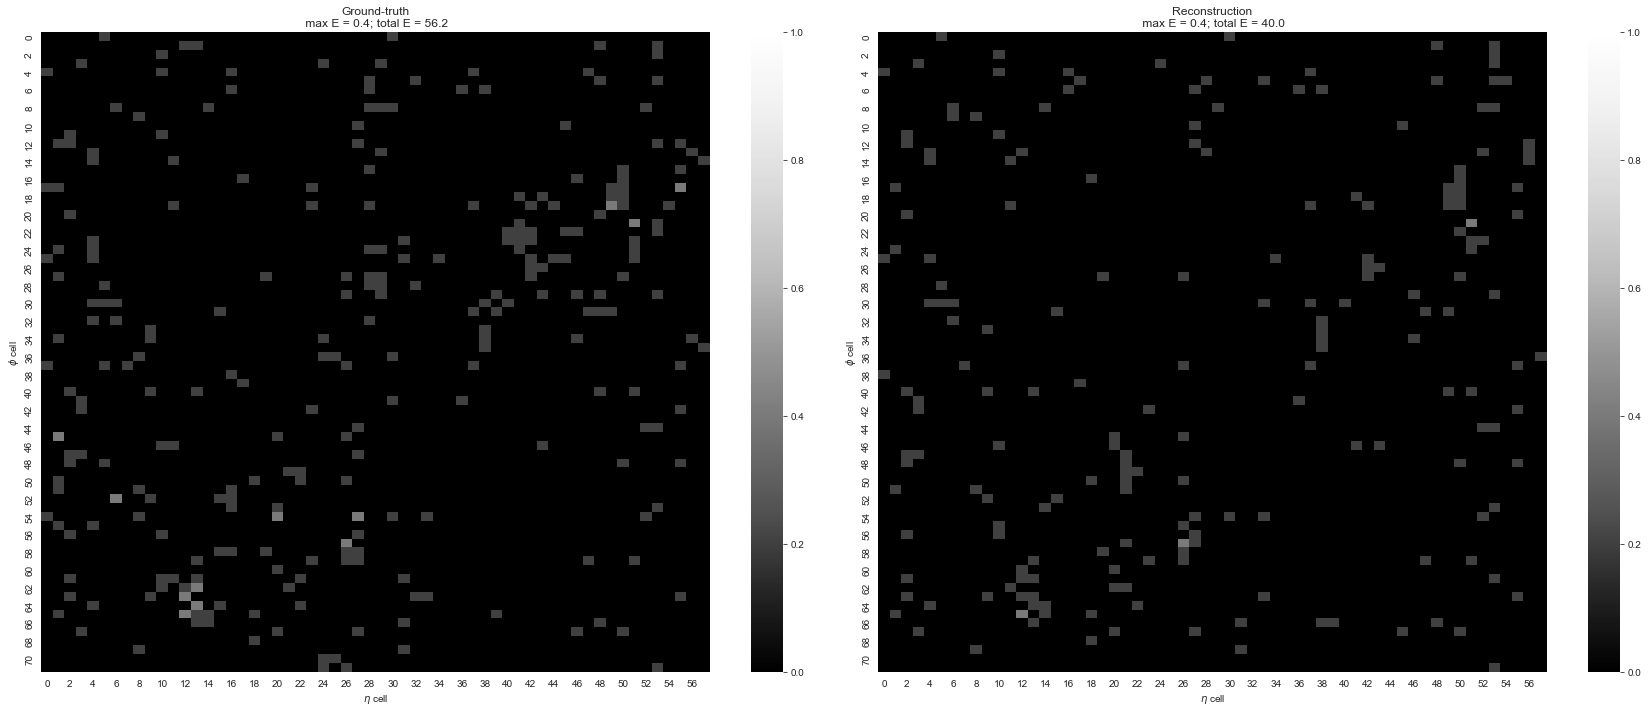

267/267 [==============================] - 197s 736ms/step - loss: 290.0201 - mse: 122.2344 - psnr: 15.7956 - ssim: 0.4888 - tau: 2.4570 - kl_loss: 25.4731 - reco_loss: 264.5475 - true_energy: 81.1801 - pred_energy: 68.1826 - grads_norm: 175.9938 - weights_norm: 158.2941 - val_loss: 288.2574 - val_mse: 121.2882 - val_psnr: 15.8413 - val_ssim: 0.4934 - val_tau: 2.5028 - val_kl_loss: 26.0082 - val_reco_loss: 262.2496 - val_true_energy: 81.1815 - val_pred_energy: 68.2248
Epoch 32/100
267/267 [==============================] - 195s 732ms/step - loss: 287.0188 - mse: 120.7673 - psnr: 15.8649 - ssim: 0.4963 - tau: 2.5330 - kl_loss: 26.3253 - reco_loss: 260.6940 - true_energy: 81.1784 - pred_energy: 68.3877 - grads_norm: 180.4411 - weights_norm: 157.2696 - val_loss: 285.2907 - val_mse: 119.8373 - val_psnr: 15.9103 - val_ssim: 0.5009 - val_tau: 2.5773 - val_kl_loss: 26.8365 - val_reco_loss: 258.4549 - val_true_energy: 81.1816 - val_pred_energy: 68.4250
Epoch 33/100
267/267 [===================

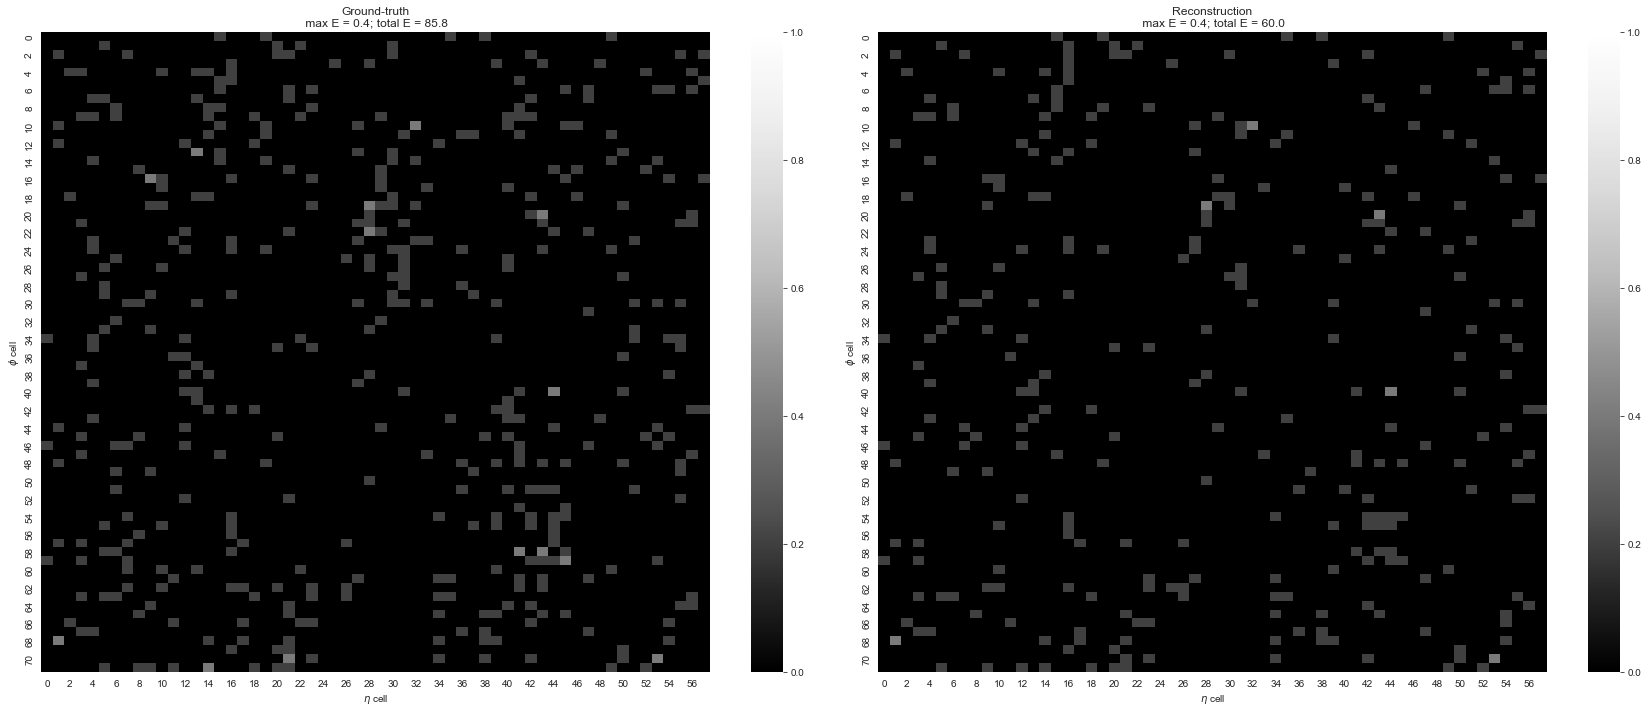

267/267 [==============================] - 196s 735ms/step - loss: 261.3419 - mse: 108.2317 - psnr: inf - ssim: 0.5593 - tau: 3.0550 - kl_loss: 32.1521 - reco_loss: 229.1901 - true_energy: 81.1807 - pred_energy: 69.9655 - grads_norm: 195.8311 - weights_norm: 149.7784 - val_loss: 259.7436 - val_mse: 107.4090 - val_psnr: inf - val_ssim: 0.5632 - val_tau: 3.0818 - val_kl_loss: 32.4634 - val_reco_loss: 227.2805 - val_true_energy: 81.1817 - val_pred_energy: 70.0168
Epoch 42/100
267/267 [==============================] - 195s 730ms/step - loss: 258.6429 - mse: 106.9184 - psnr: inf - ssim: 0.5657 - tau: 3.0996 - kl_loss: 32.6436 - reco_loss: 225.9995 - true_energy: 81.1815 - pred_energy: 70.1258 - grads_norm: 196.2530 - weights_norm: 149.1129 - val_loss: 257.0717 - val_mse: 106.1107 - val_psnr: inf - val_ssim: 0.5696 - val_tau: 3.1254 - val_kl_loss: 32.9434 - val_reco_loss: 224.1285 - val_true_energy: 81.1817 - val_pred_energy: 70.2256
Epoch 43/100
267/267 [==============================] - 1

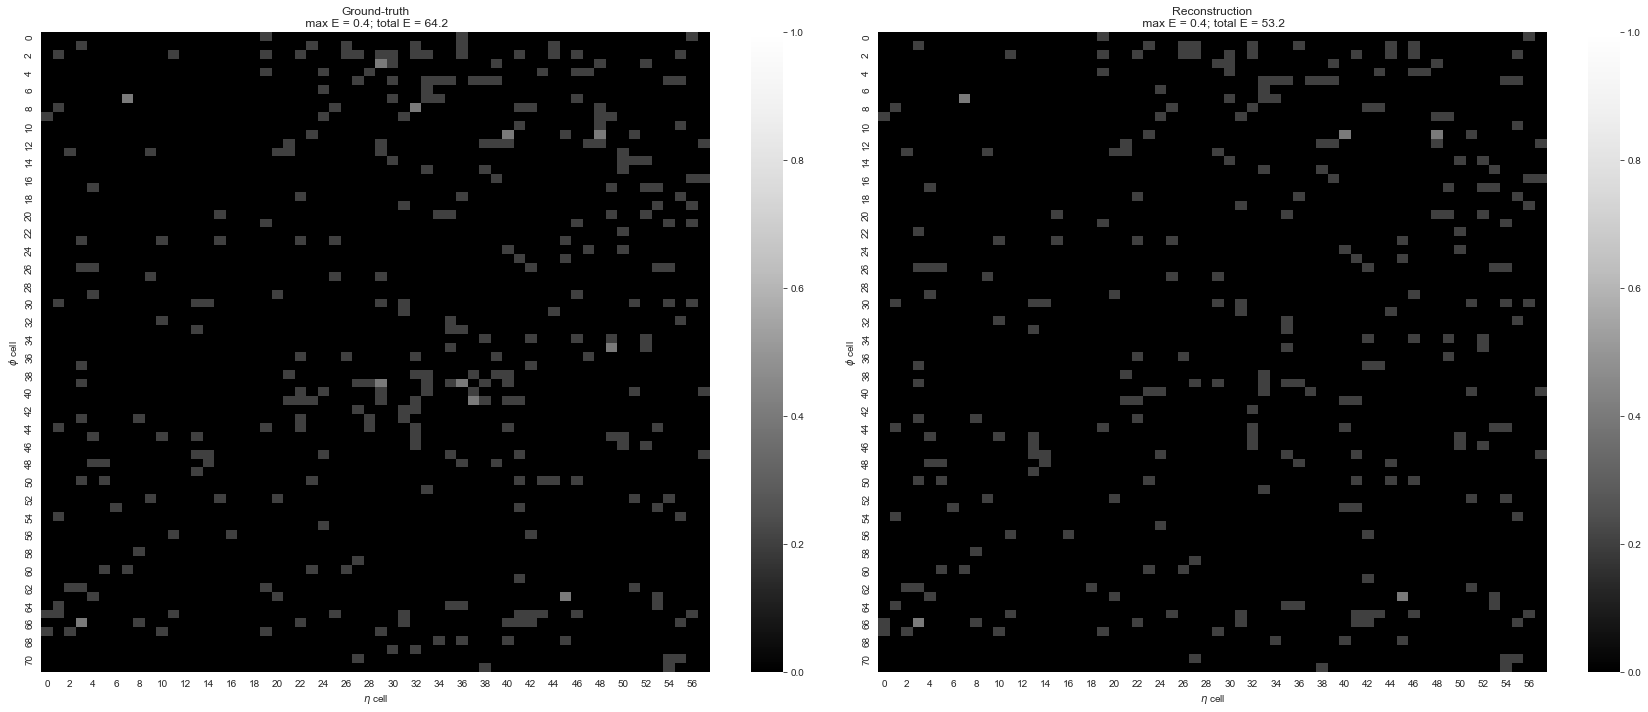

267/267 [==============================] - 197s 736ms/step - loss: 235.9186 - mse: 95.7731 - psnr: inf - ssim: 0.6185 - tau: 3.4158 - kl_loss: 36.1064 - reco_loss: 199.8129 - true_energy: 81.1802 - pred_energy: 71.6026 - grads_norm: 196.3313 - weights_norm: 144.1535 - val_loss: 234.5786 - val_mse: 95.0868 - val_psnr: inf - val_ssim: 0.6216 - val_tau: 3.4316 - val_kl_loss: 36.2942 - val_reco_loss: 198.2851 - val_true_energy: 81.1815 - val_pred_energy: 71.6561
Epoch 52/100
267/267 [==============================] - 199s 744ms/step - loss: 233.6561 - mse: 94.6599 - psnr: inf - ssim: 0.6236 - tau: 3.4418 - kl_loss: 36.3978 - reco_loss: 197.2589 - true_energy: 81.1821 - pred_energy: 71.7314 - grads_norm: 196.2869 - weights_norm: 143.6941 - val_loss: 232.3320 - val_mse: 93.9860 - val_psnr: inf - val_ssim: 0.6267 - val_tau: 3.4559 - val_kl_loss: 36.5722 - val_reco_loss: 195.7604 - val_true_energy: 81.1816 - val_pred_energy: 71.8119
Epoch 53/100
267/267 [==============================] - 201s 

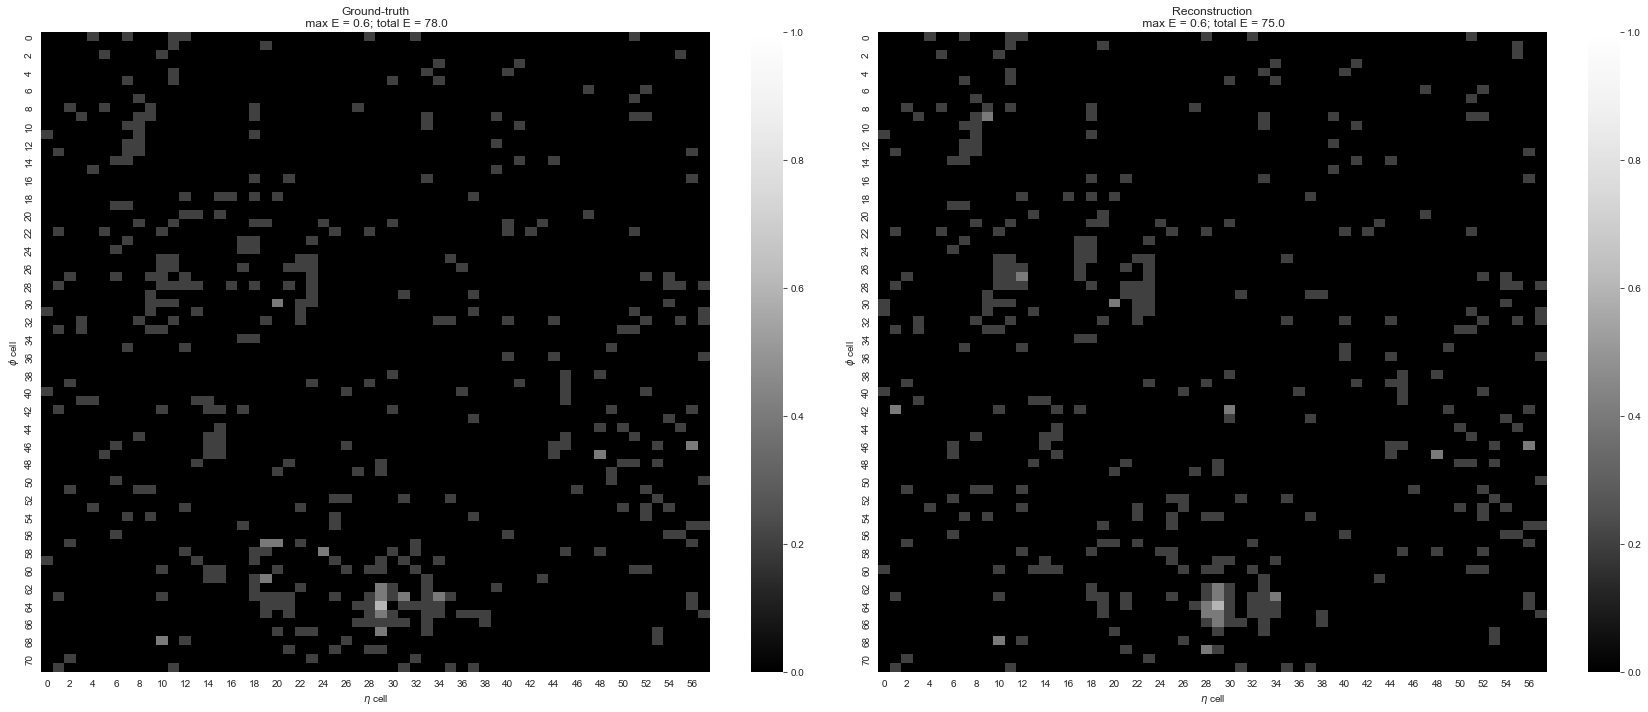

267/267 [==============================] - 197s 736ms/step - loss: 215.6071 - mse: 85.8273 - psnr: inf - ssim: 0.6637 - tau: 3.6088 - kl_loss: 38.4037 - reco_loss: 177.2040 - true_energy: 81.1802 - pred_energy: 72.8547 - grads_norm: 195.1371 - weights_norm: 140.1641 - val_loss: 214.5648 - val_mse: 85.2995 - val_psnr: inf - val_ssim: 0.6661 - val_tau: 3.6169 - val_kl_loss: 38.5159 - val_reco_loss: 176.0496 - val_true_energy: 81.1814 - val_pred_energy: 72.9154
Epoch 62/100
267/267 [==============================] - 195s 732ms/step - loss: 213.8462 - mse: 84.9680 - psnr: inf - ssim: 0.6676 - tau: 3.6223 - kl_loss: 38.5750 - reco_loss: 175.2718 - true_energy: 81.1804 - pred_energy: 72.9689 - grads_norm: 195.0462 - weights_norm: 139.8283 - val_loss: 212.8268 - val_mse: 84.4508 - val_psnr: inf - val_ssim: 0.6699 - val_tau: 3.6300 - val_kl_loss: 38.6829 - val_reco_loss: 174.1447 - val_true_energy: 81.1815 - val_pred_energy: 73.0267
Epoch 63/100
267/267 [==============================] - 195s 

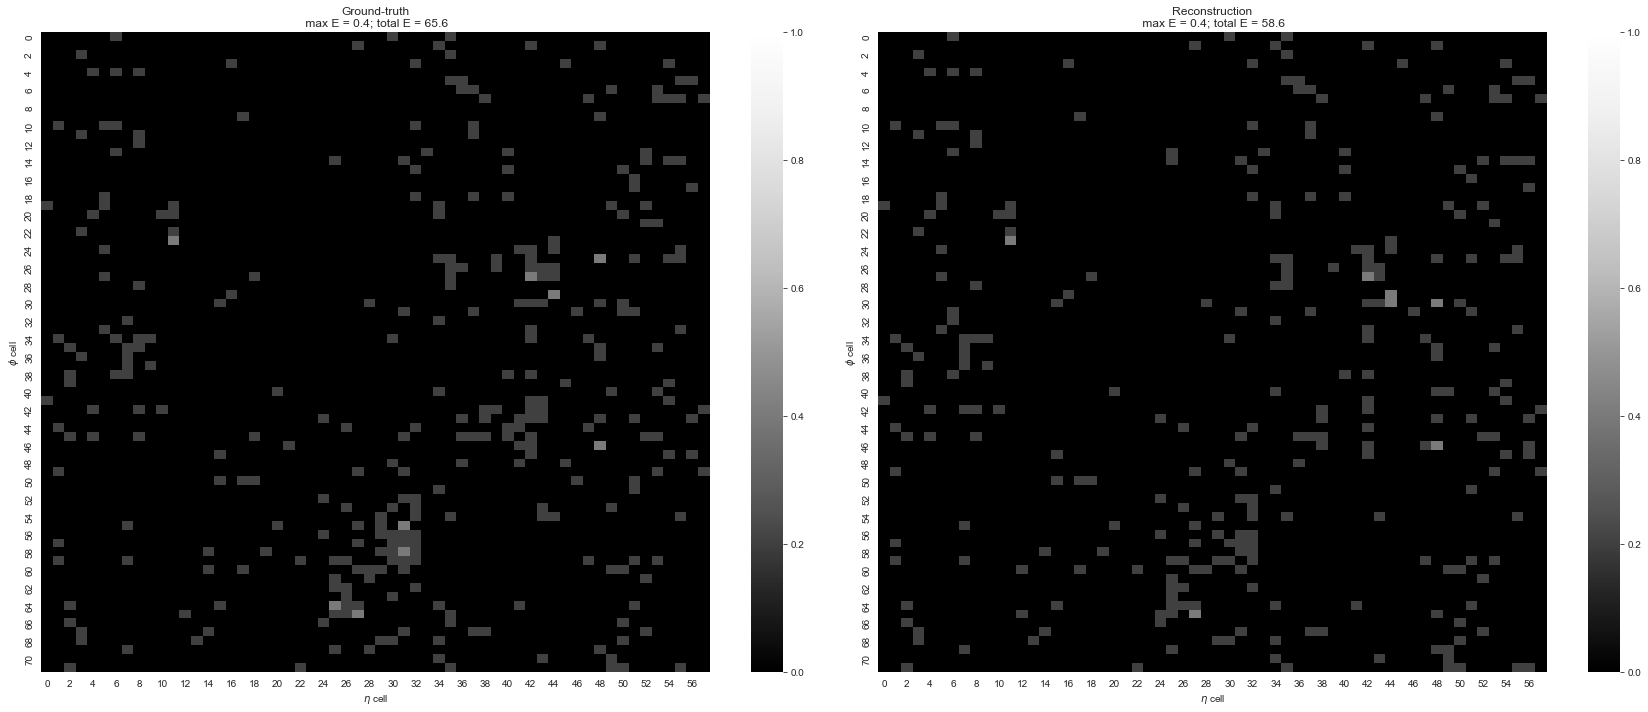

267/267 [==============================] - 206s 770ms/step - loss: 199.5515 - mse: 77.9817 - psnr: inf - ssim: 0.6985 - tau: 3.7146 - kl_loss: 39.8000 - reco_loss: 159.7525 - true_energy: 81.1810 - pred_energy: 73.8611 - grads_norm: 194.6073 - weights_norm: 137.2176 - val_loss: 198.7168 - val_mse: 77.5573 - val_psnr: inf - val_ssim: 0.7003 - val_tau: 3.7193 - val_kl_loss: 39.8723 - val_reco_loss: 158.8454 - val_true_energy: 81.1815 - val_pred_energy: 73.8975
Epoch 72/100
267/267 [==============================] - 222s 830ms/step - loss: 198.1370 - mse: 77.2891 - psnr: inf - ssim: 0.7015 - tau: 3.7225 - kl_loss: 39.9083 - reco_loss: 158.2298 - true_energy: 81.1805 - pred_energy: 73.9375 - grads_norm: 194.6800 - weights_norm: 136.9667 - val_loss: 197.3177 - val_mse: 76.8745 - val_psnr: inf - val_ssim: 0.7033 - val_tau: 3.7268 - val_kl_loss: 39.9770 - val_reco_loss: 157.3418 - val_true_energy: 81.1815 - val_pred_energy: 73.9783
Epoch 73/100
267/267 [==============================] - 207s 

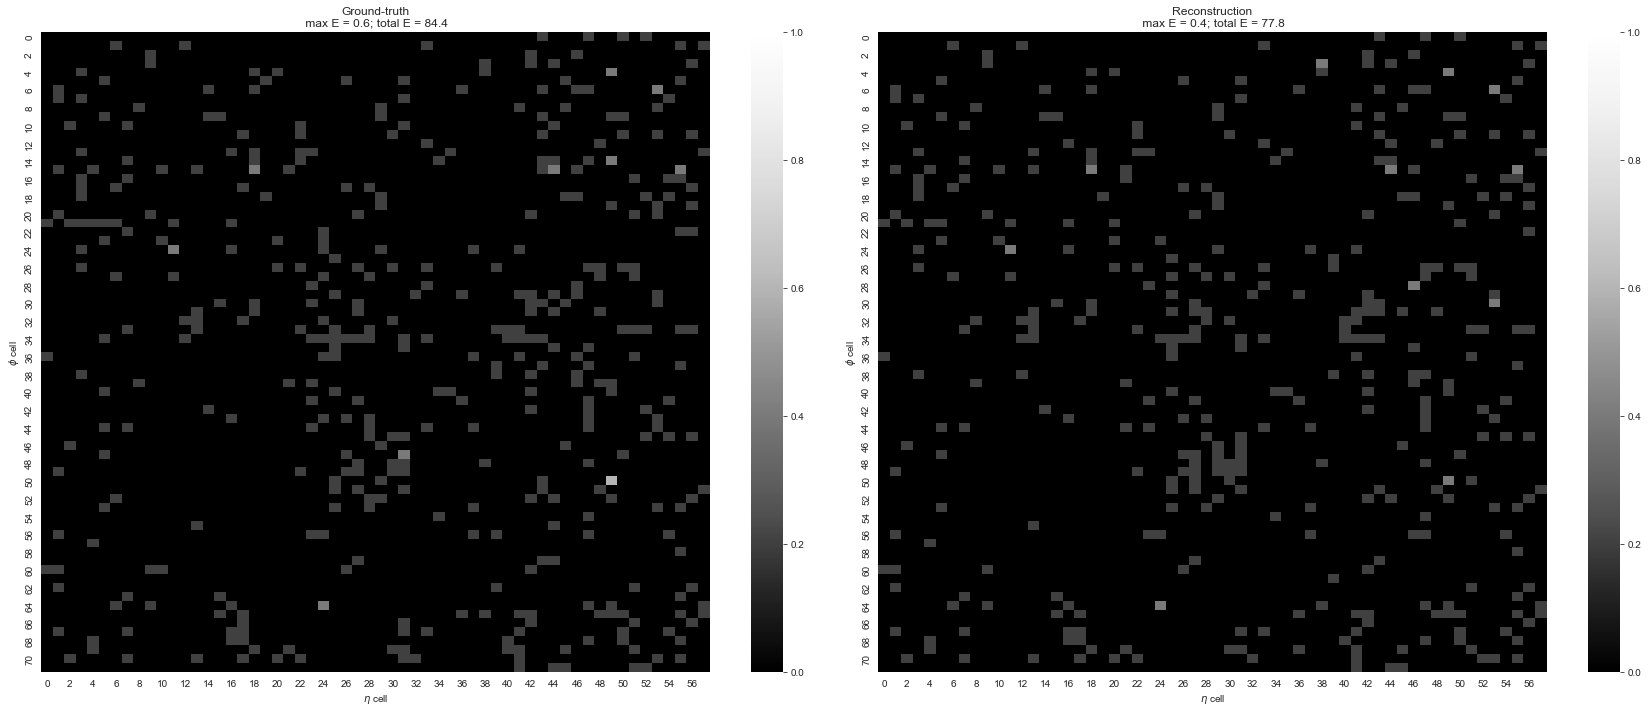

267/267 [==============================] - 199s 746ms/step - loss: 186.5639 - mse: 71.6415 - psnr: inf - ssim: 0.7259 - tau: 3.7767 - kl_loss: 40.6984 - reco_loss: 145.8663 - true_energy: 81.1811 - pred_energy: 74.6442 - grads_norm: 196.4400 - weights_norm: 135.0379 - val_loss: 185.8766 - val_mse: 71.2944 - val_psnr: inf - val_ssim: 0.7274 - val_tau: 3.7792 - val_kl_loss: 40.7463 - val_reco_loss: 145.1311 - val_true_energy: 81.1814 - val_pred_energy: 74.6820
Epoch 82/100
267/267 [==============================] - 200s 751ms/step - loss: 185.4015 - mse: 71.0746 - psnr: inf - ssim: 0.7283 - tau: 3.7812 - kl_loss: 40.7688 - reco_loss: 144.6336 - true_energy: 81.1814 - pred_energy: 74.7144 - grads_norm: 196.8035 - weights_norm: 134.8534 - val_loss: 184.7253 - val_mse: 70.7335 - val_psnr: inf - val_ssim: 0.7298 - val_tau: 3.7838 - val_kl_loss: 40.8150 - val_reco_loss: 143.9110 - val_true_energy: 81.1815 - val_pred_energy: 74.7579
Epoch 83/100
267/267 [==============================] - 200s 

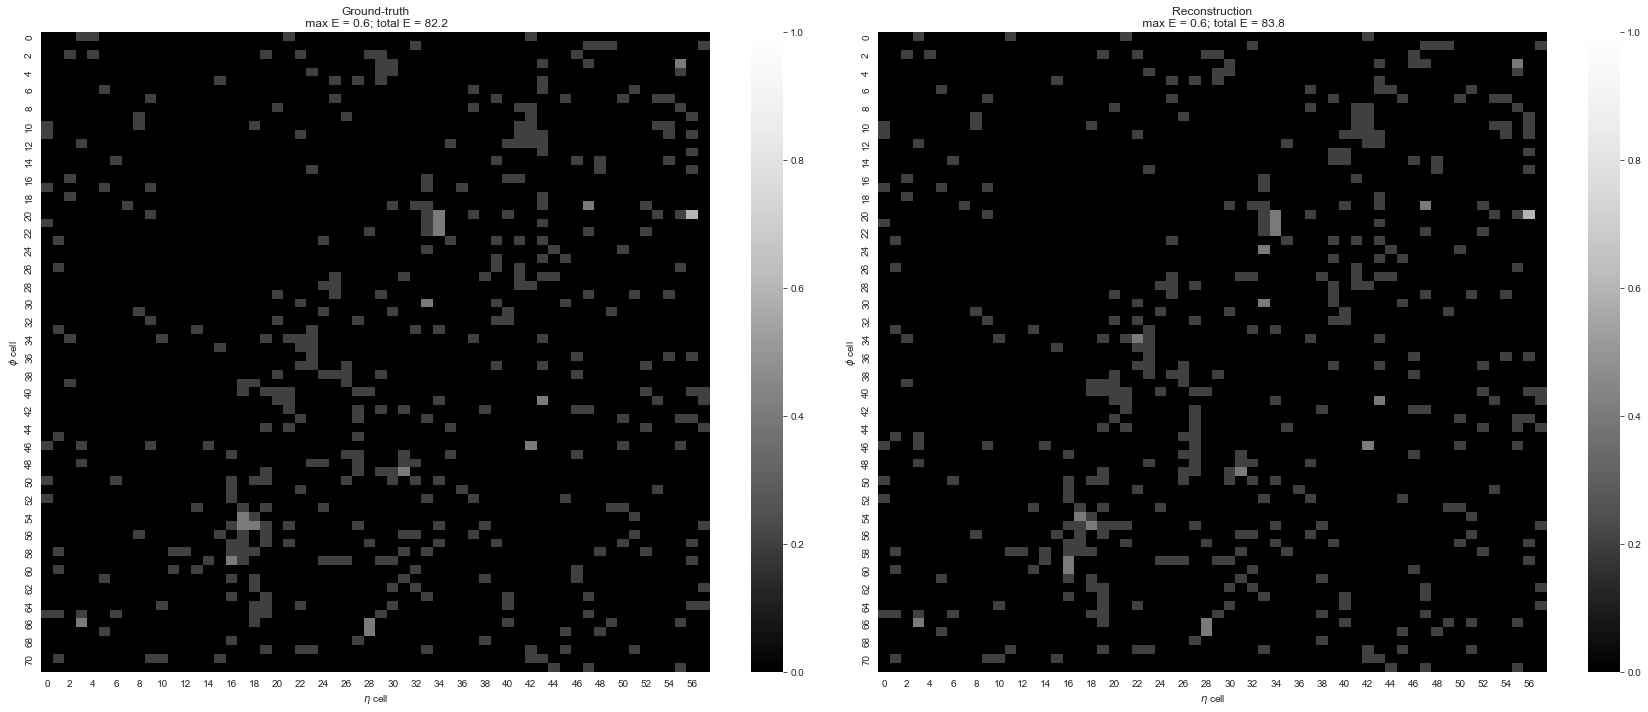

267/267 [==============================] - 195s 729ms/step - loss: 175.8703 - mse: 66.4356 - psnr: inf - ssim: 0.7480 - tau: 3.8131 - kl_loss: 41.2851 - reco_loss: 134.5862 - true_energy: 81.1803 - pred_energy: 75.2599 - grads_norm: 202.1543 - weights_norm: 133.4207 - val_loss: 175.3030 - val_mse: 66.1499 - val_psnr: inf - val_ssim: 0.7492 - val_tau: 3.8146 - val_kl_loss: 41.3189 - val_reco_loss: 133.9850 - val_true_energy: 81.1815 - val_pred_energy: 75.3030
Epoch 92/100
267/267 [==============================] - 196s 735ms/step - loss: 174.9080 - mse: 65.9677 - psnr: inf - ssim: 0.7500 - tau: 3.8158 - kl_loss: 41.3331 - reco_loss: 133.5759 - true_energy: 81.1807 - pred_energy: 75.3283 - grads_norm: 202.8629 - weights_norm: 133.2829 - val_loss: 174.3479 - val_mse: 65.6854 - val_psnr: inf - val_ssim: 0.7512 - val_tau: 3.8176 - val_kl_loss: 41.3666 - val_reco_loss: 132.9822 - val_true_energy: 81.1815 - val_pred_energy: 75.3610
Epoch 93/100
267/267 [==============================] - 194s 

In [19]:
h = vae.fit(x=train['trk_mask'], epochs=100, validation_split=0.25, verbose=1,
            batch_size=128, callbacks=[plot, checkpoint])

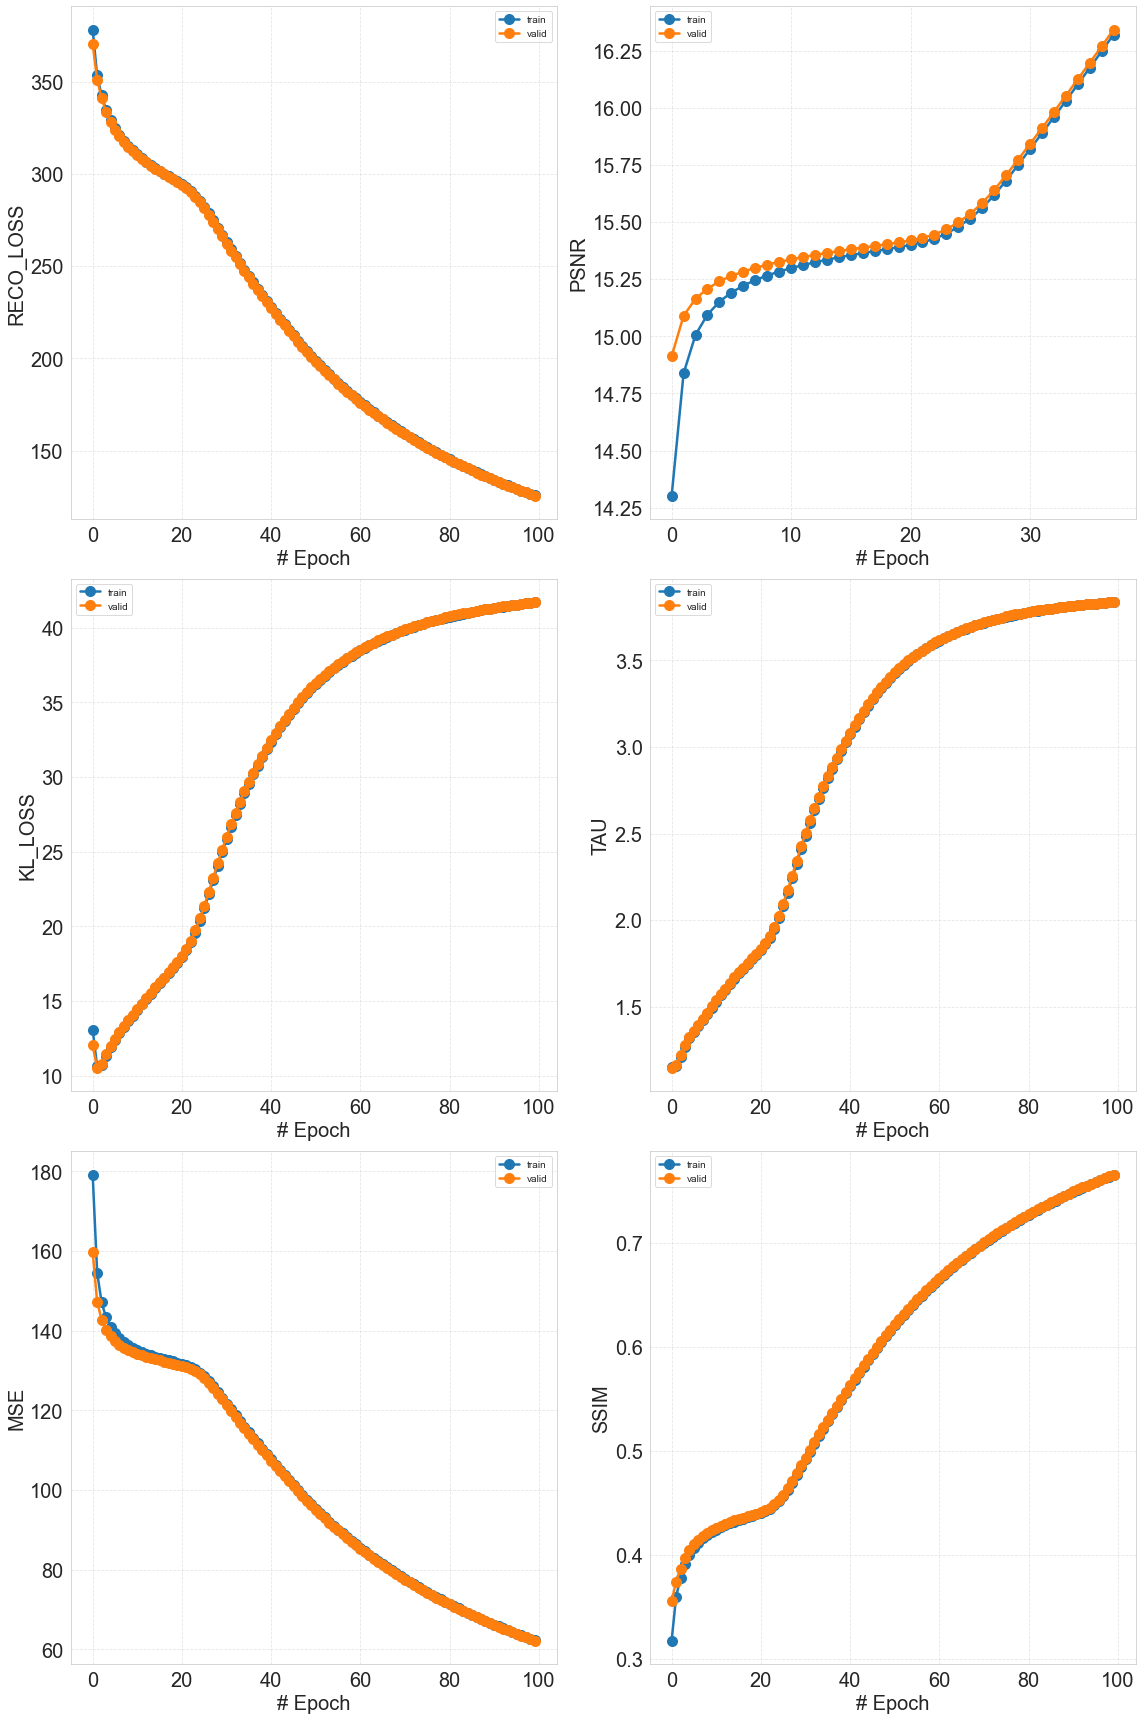

In [20]:
ad.plot.history(h, keys=['reco_loss', 'psnr', 'kl_loss', 'tau', 'mse', 'ssim'], rows=3)

Evaluation

In [9]:
utils.load_from_checkpoint(vae, path='categorical_codvae', mode='max')

Loaded from "weights\categorical_codvae\weights-100-0.766"


In [10]:
x_test = utils.read_npz(folder=os.path.join('data/n_tracks', 'test'),
                        dtype=np.float32, verbose=False,
                        keys=['images', 'labels', 'masses'])

y_test = x_test['labels']
m_test = x_test['masses']
x_test = x_test['images']
x_mask = (x_test > 0.0)[..., 0, np.newaxis].astype(np.float32)

del x_test
utils.free_mem()

231

QCD
#170152
5318/5318 [==============================] - 231s 42ms/step


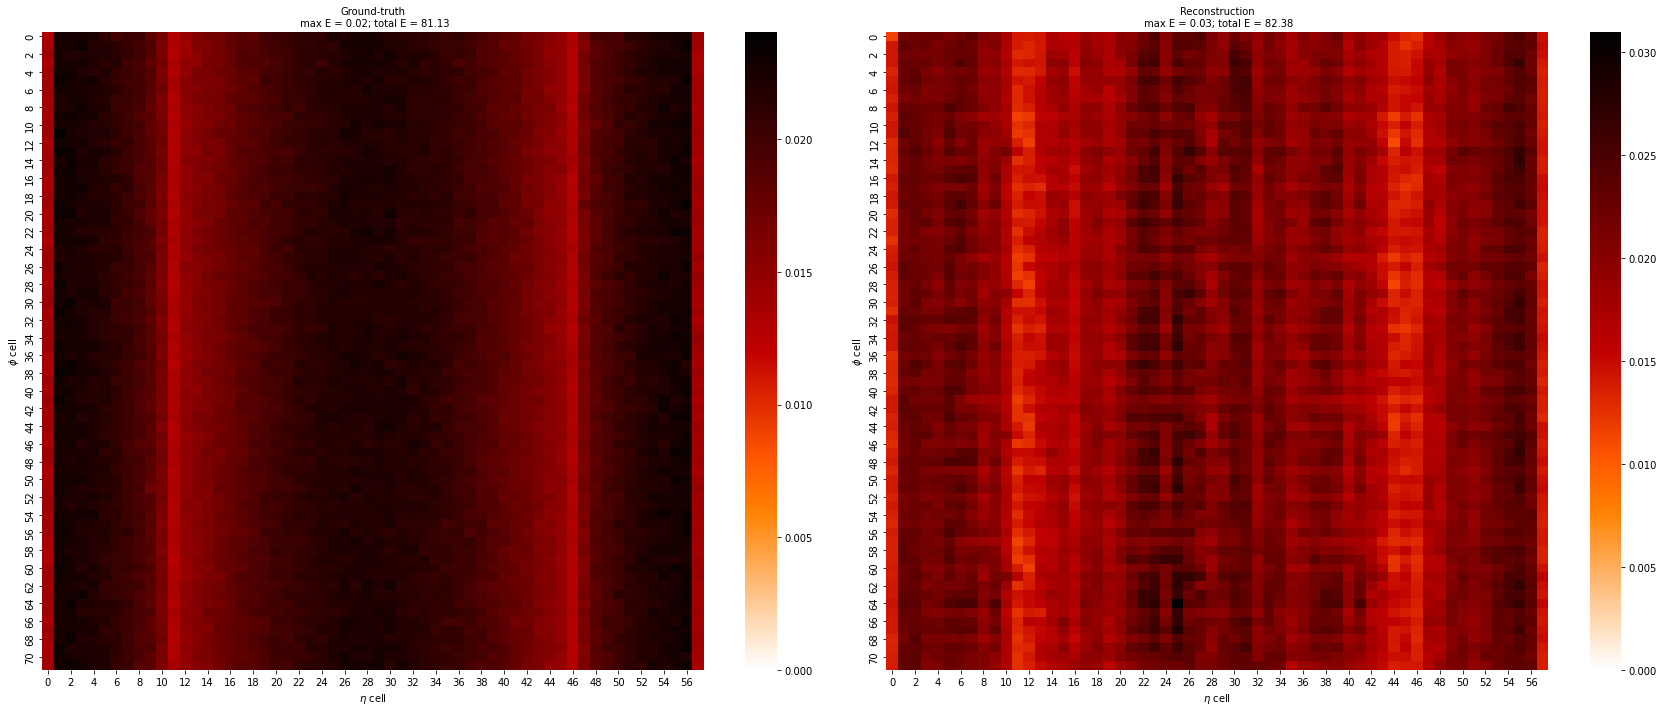

SUEP (125)
#4124
129/129 [==============================] - 6s 47ms/step


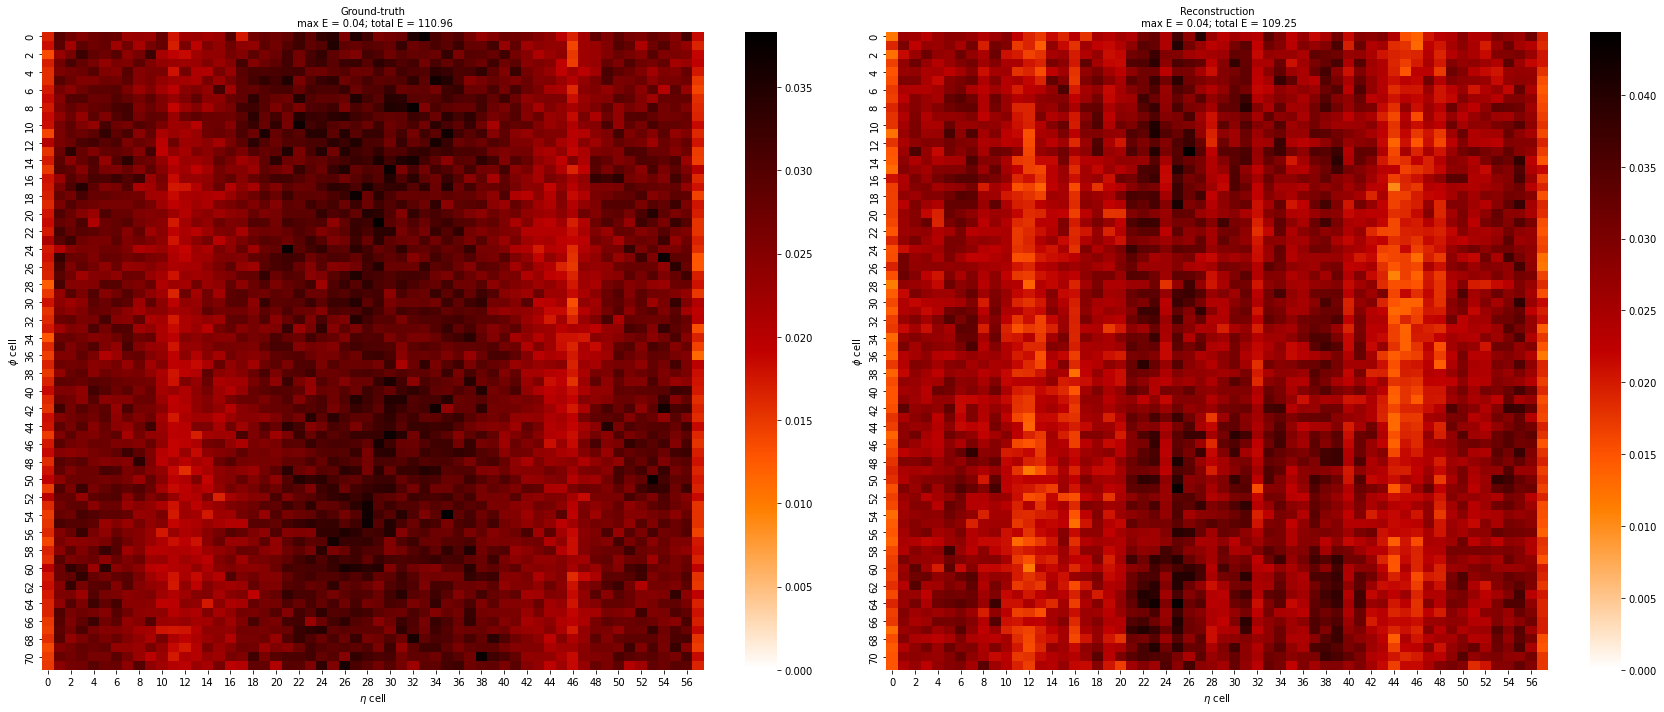

SUEP (200)
#3994
125/125 [==============================] - 6s 46ms/step


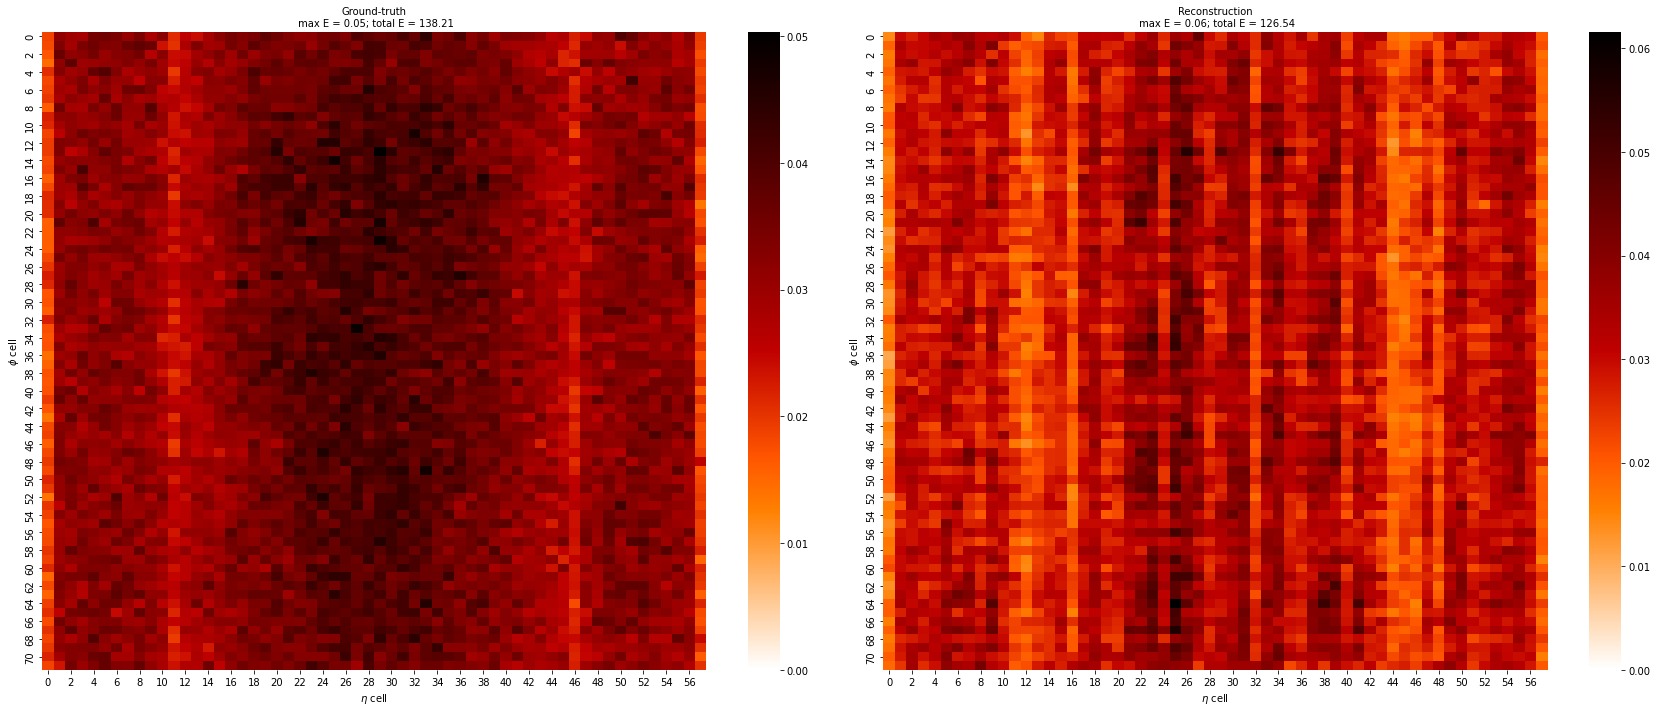

SUEP (300)
#7095
222/222 [==============================] - 10s 43ms/step


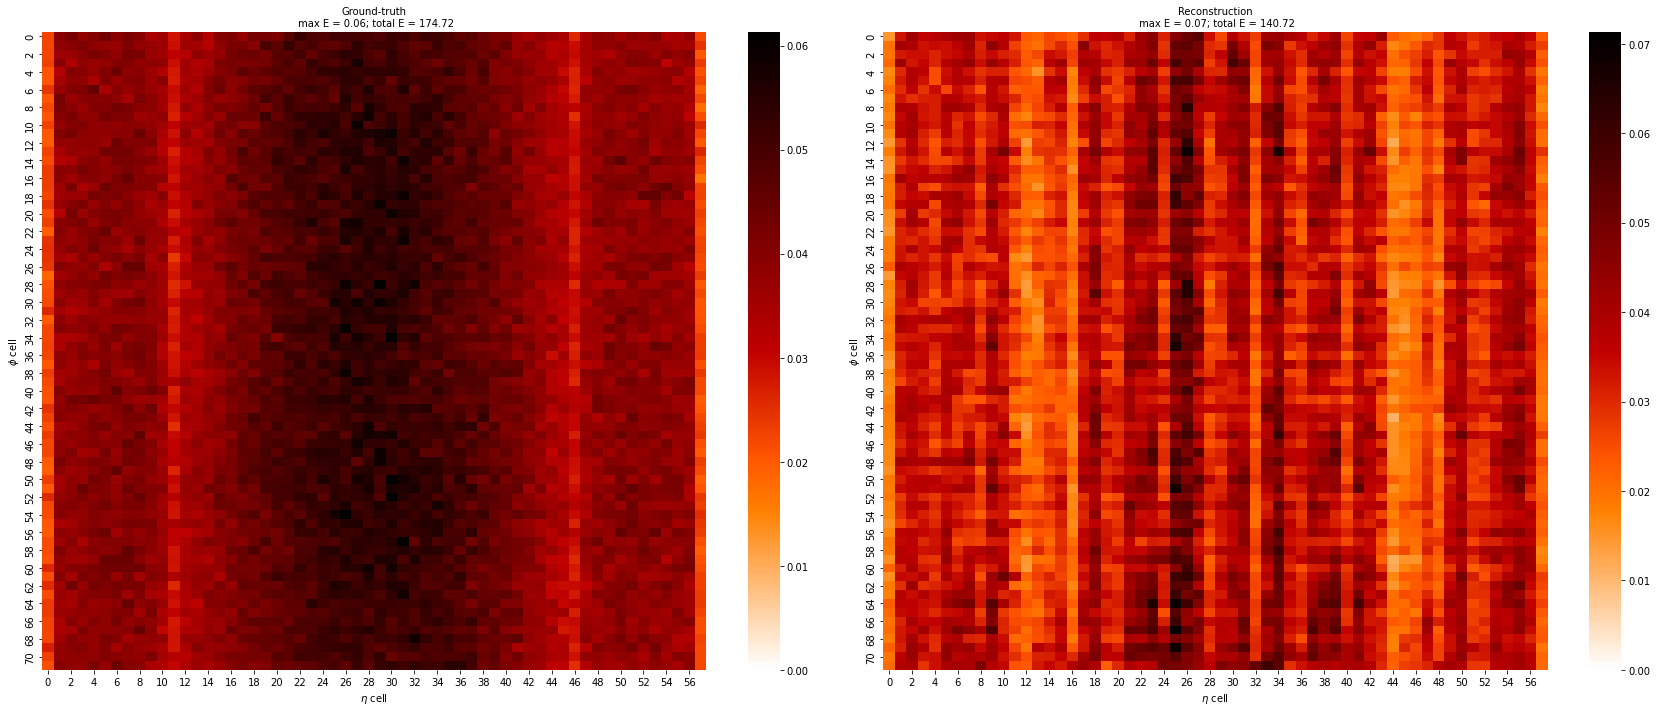

SUEP (400)
#10173
318/318 [==============================] - 14s 43ms/step


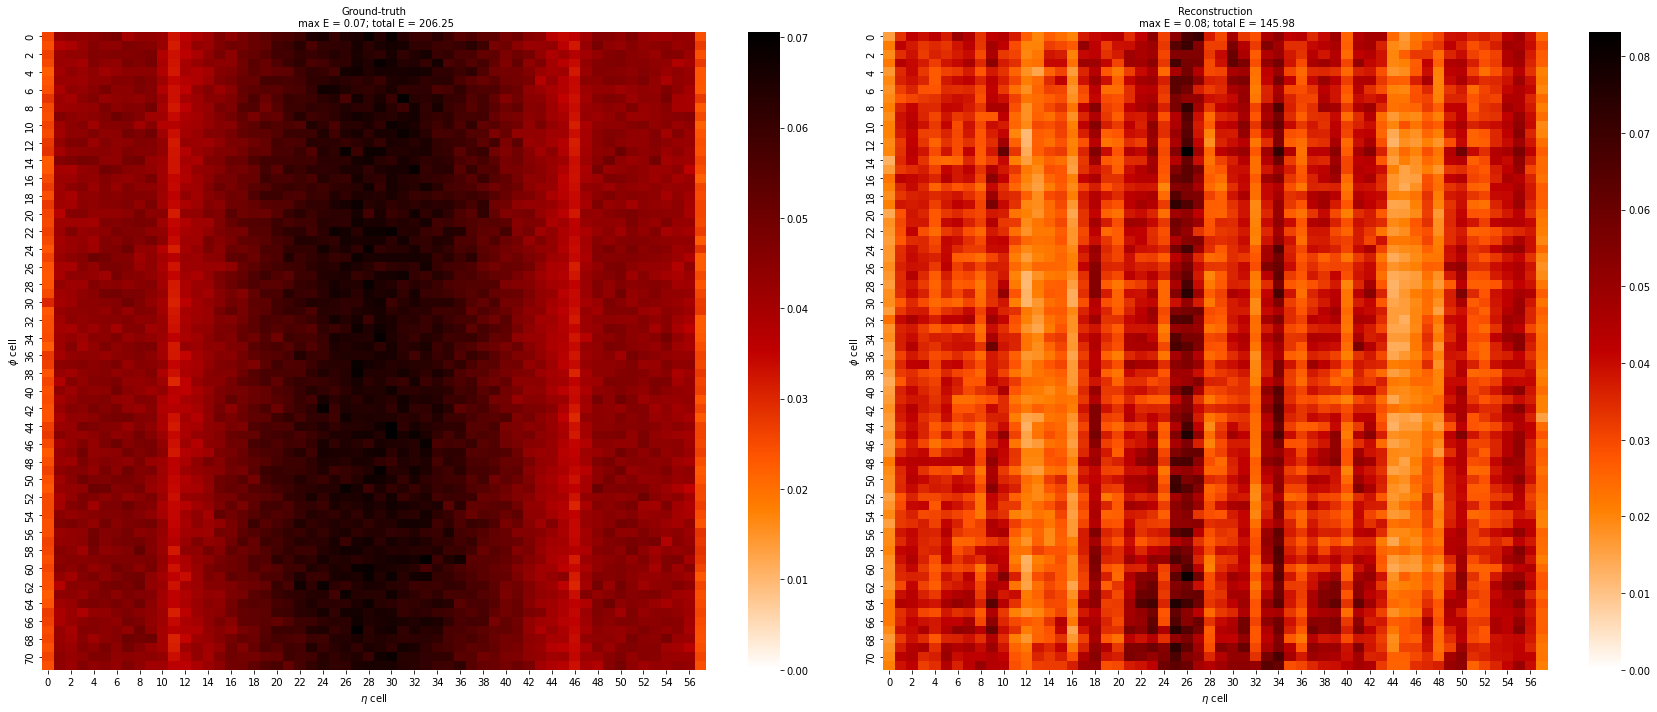

SUEP (700)
#18605
582/582 [==============================] - 24s 41ms/step


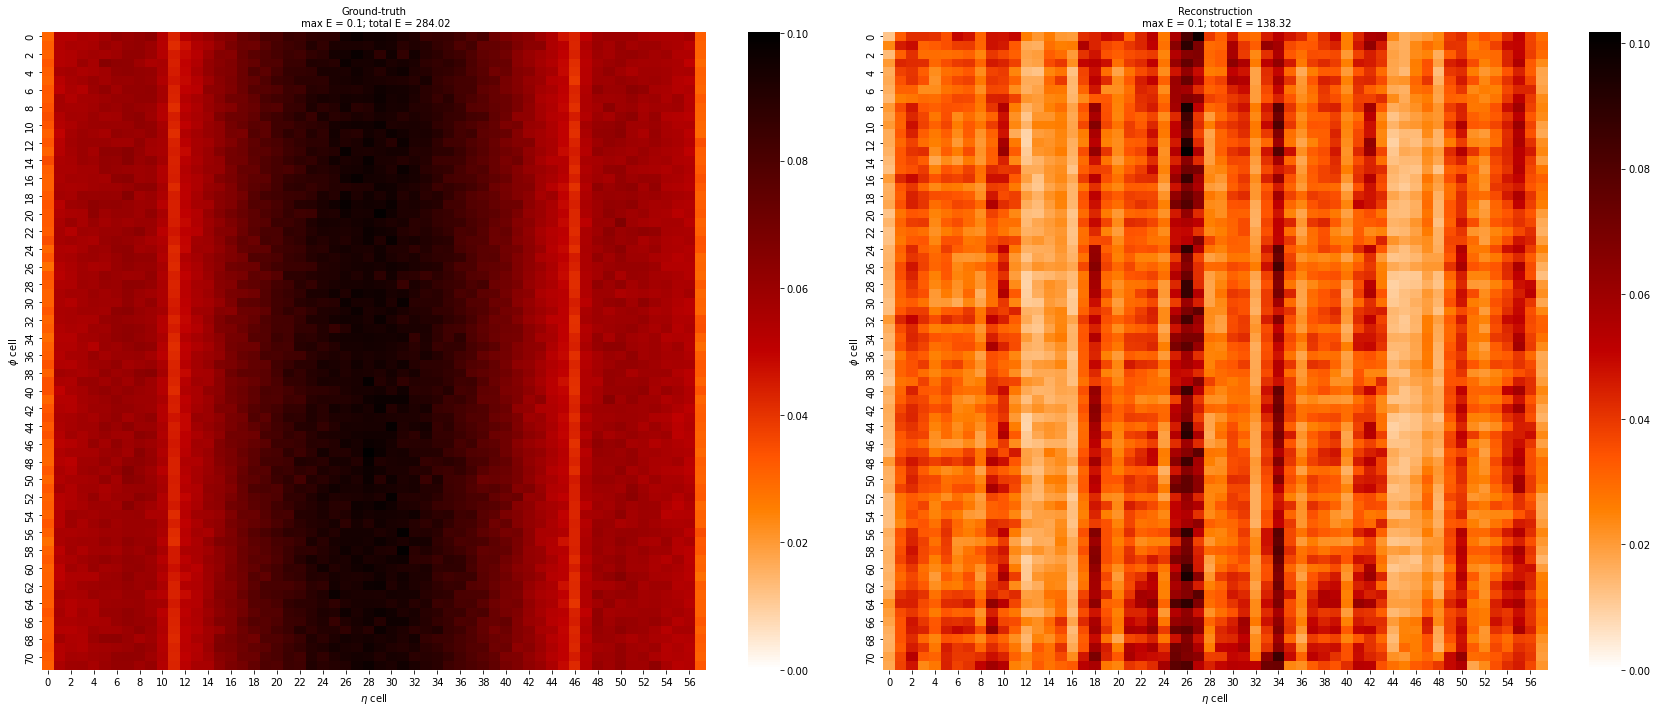

SUEP (1000)
#23151
724/724 [==============================] - 31s 42ms/step


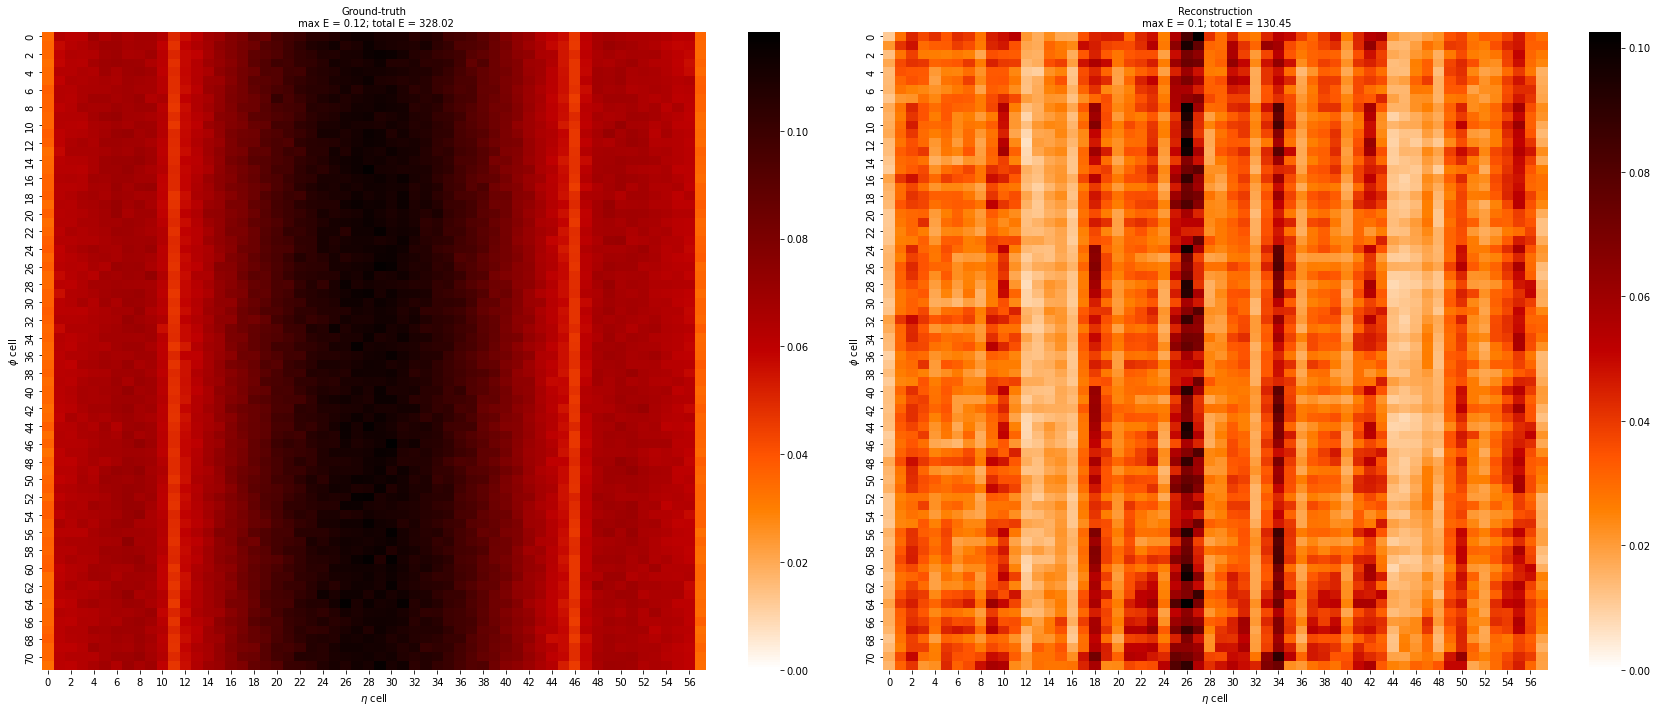

SVJ (2.1)
#27517
860/860 [==============================] - 36s 41ms/step


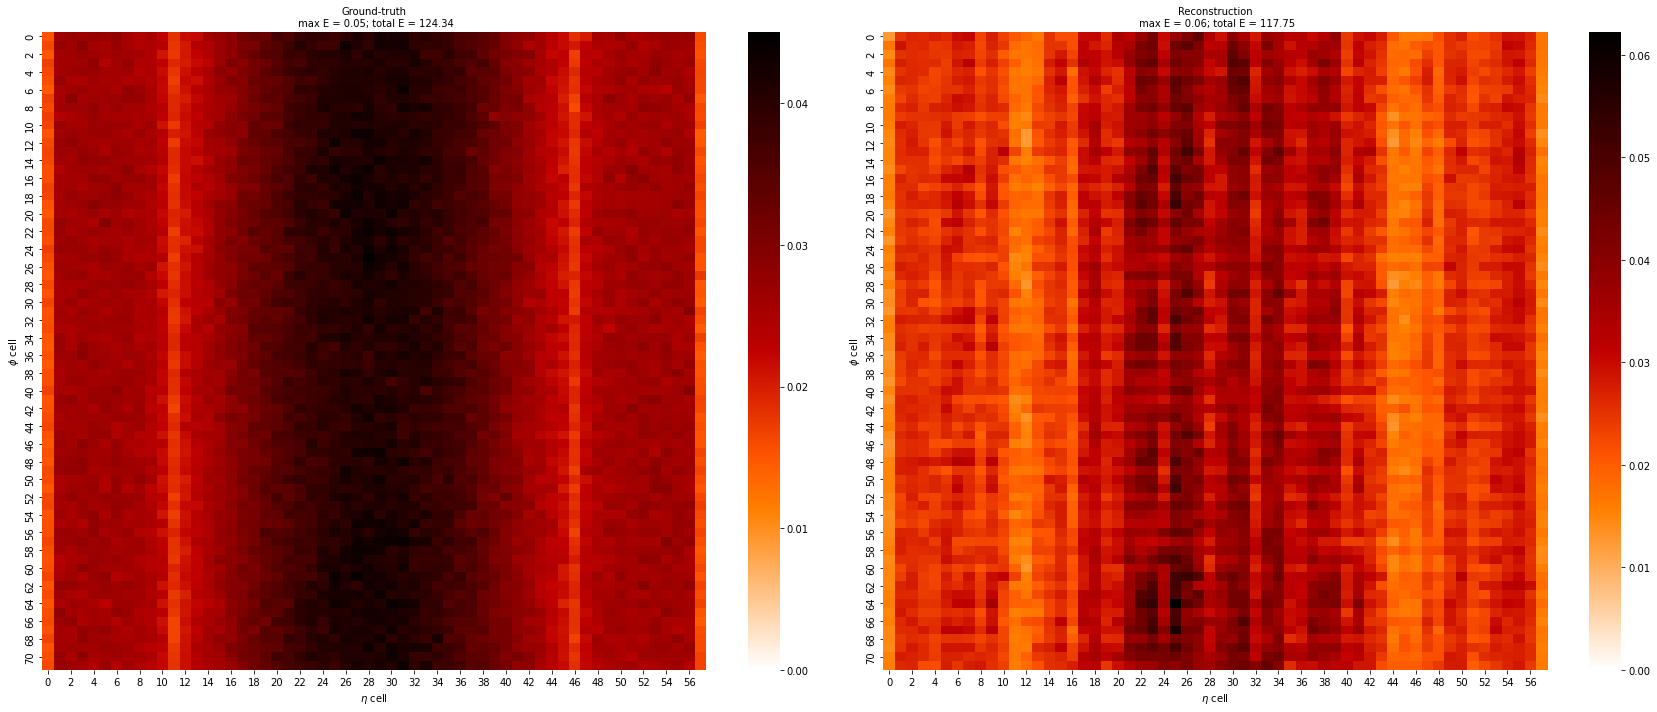

SVJ (3.1)
#40315
1260/1260 [==============================] - 52s 41ms/step


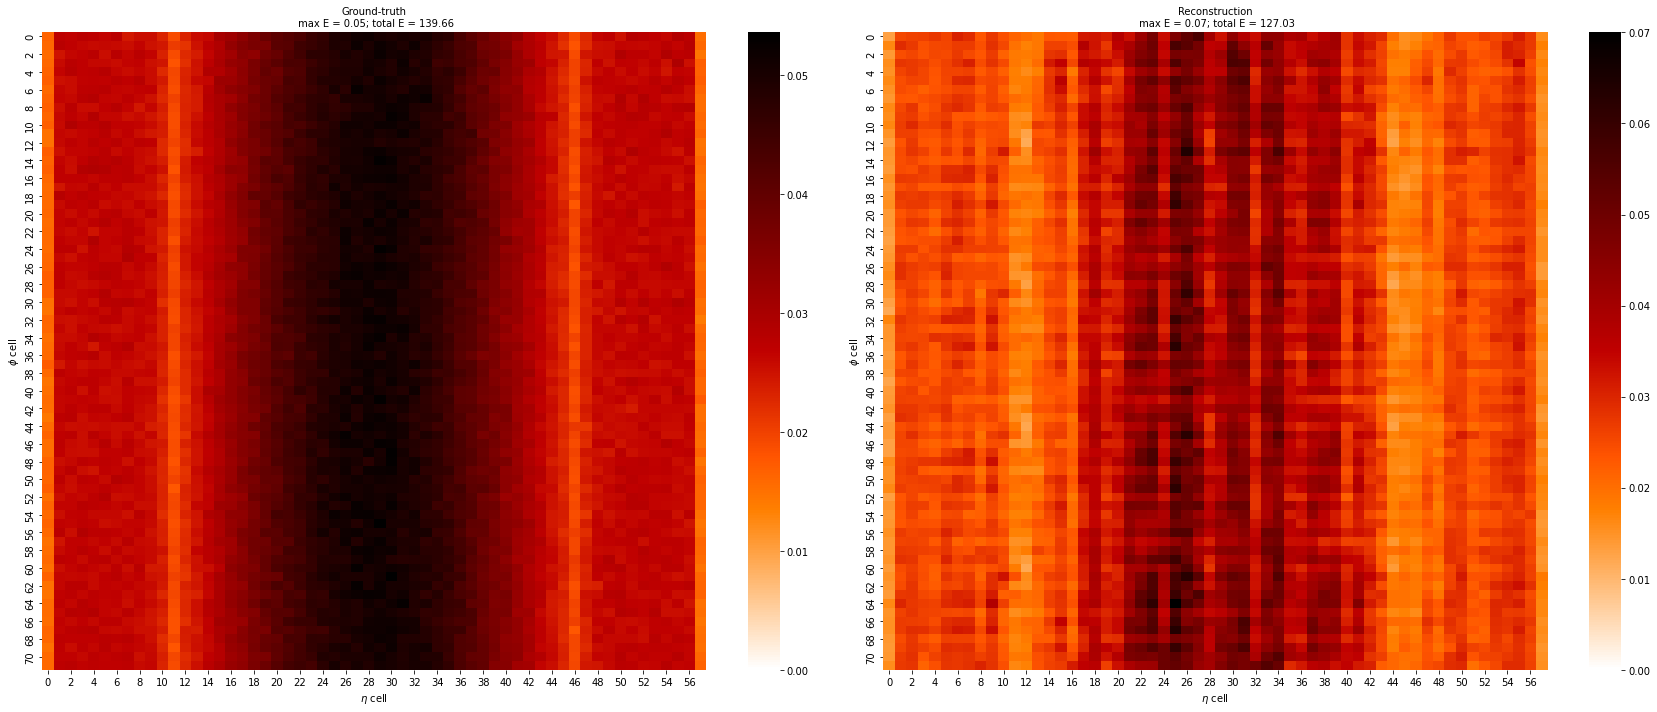

SVJ (4.1)
#38643
1208/1208 [==============================] - 50s 41ms/step


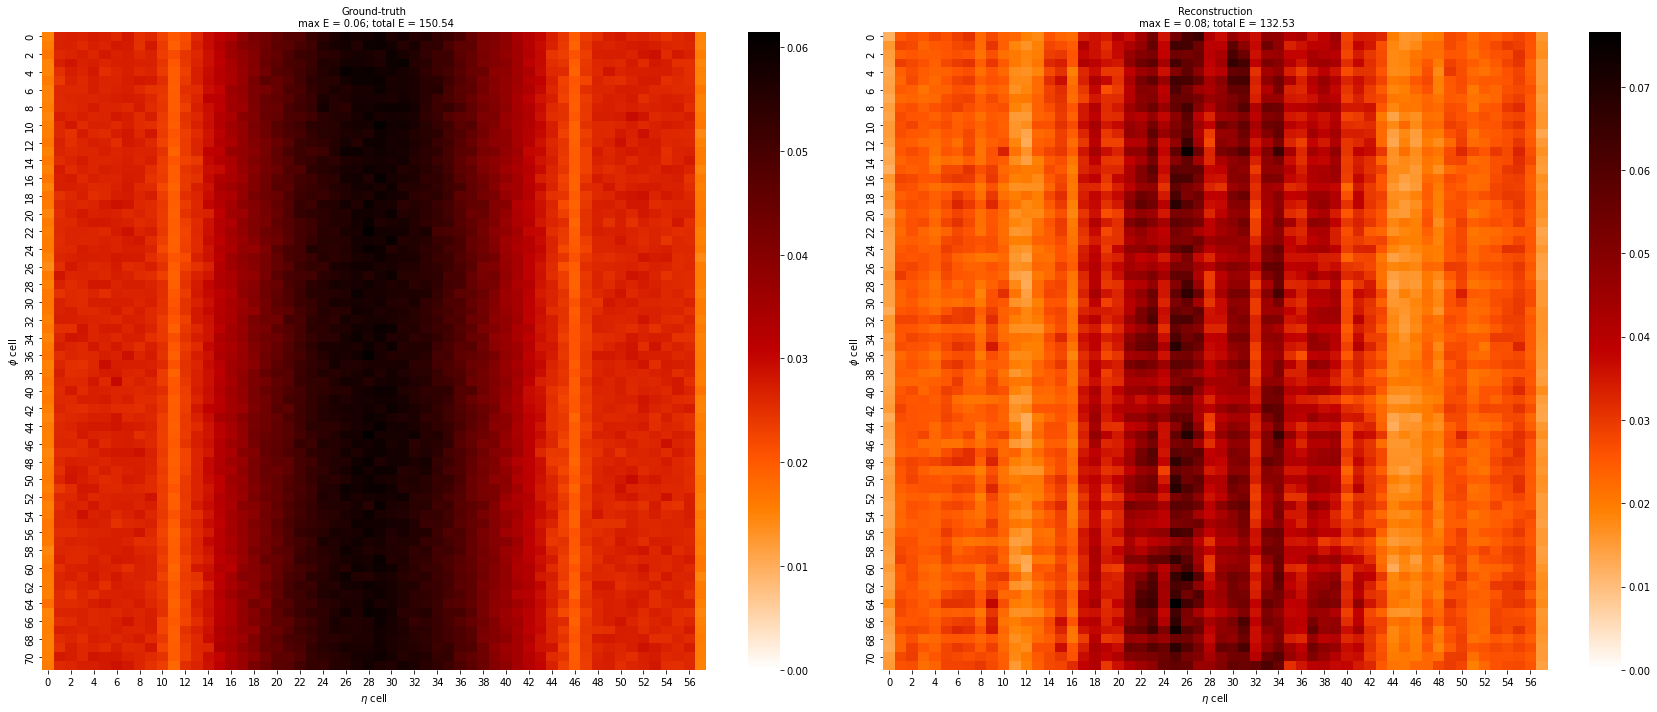

In [13]:
ad.eval2.average_predictions(vae, x=x_mask, y=y_test, m=m_test, verbose=1)

In [24]:
y_pred = vae.predict(x_mask, verbose=1)

2180/2180 [==============================] - 90s 41ms/step


i: 44003


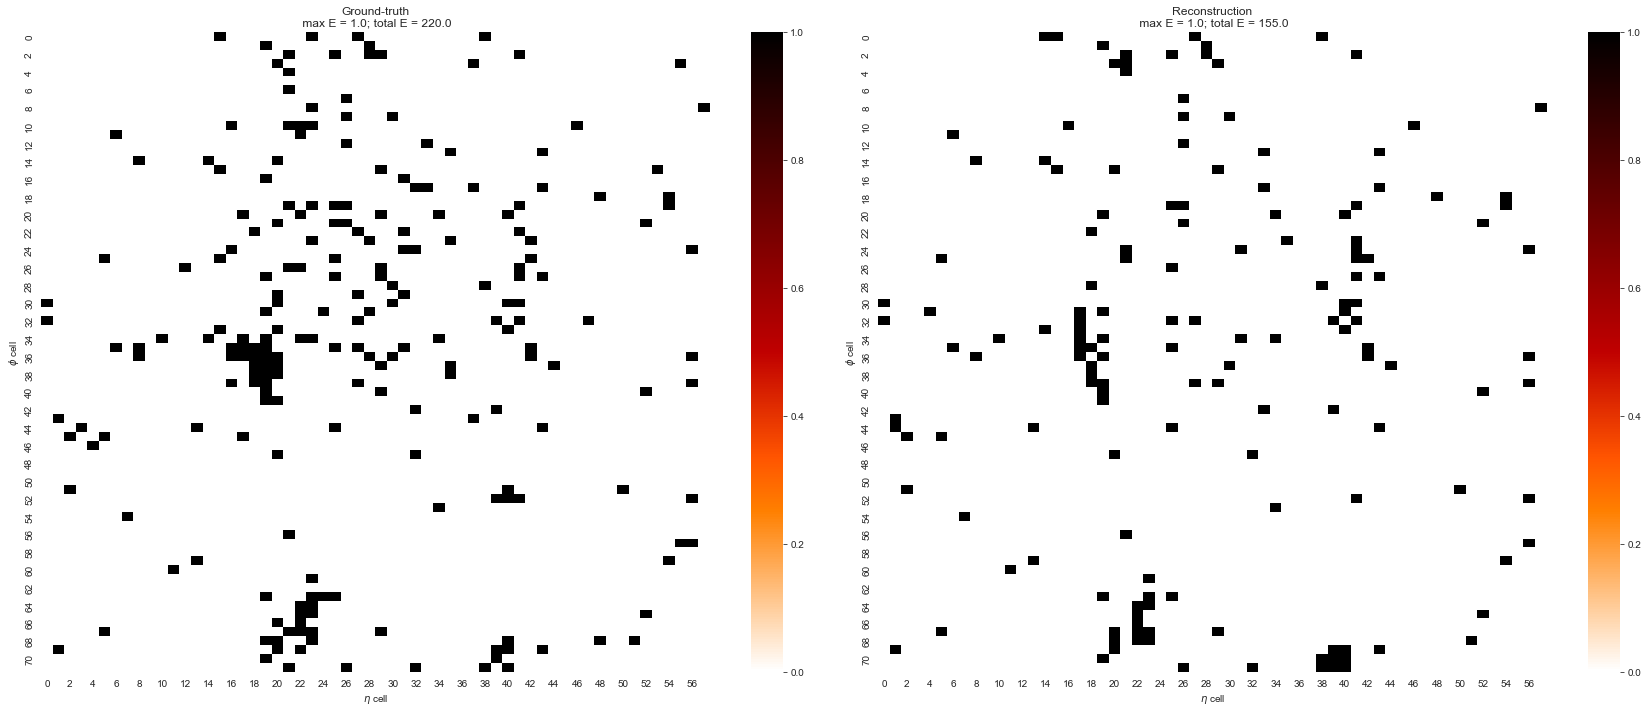

i: 55376


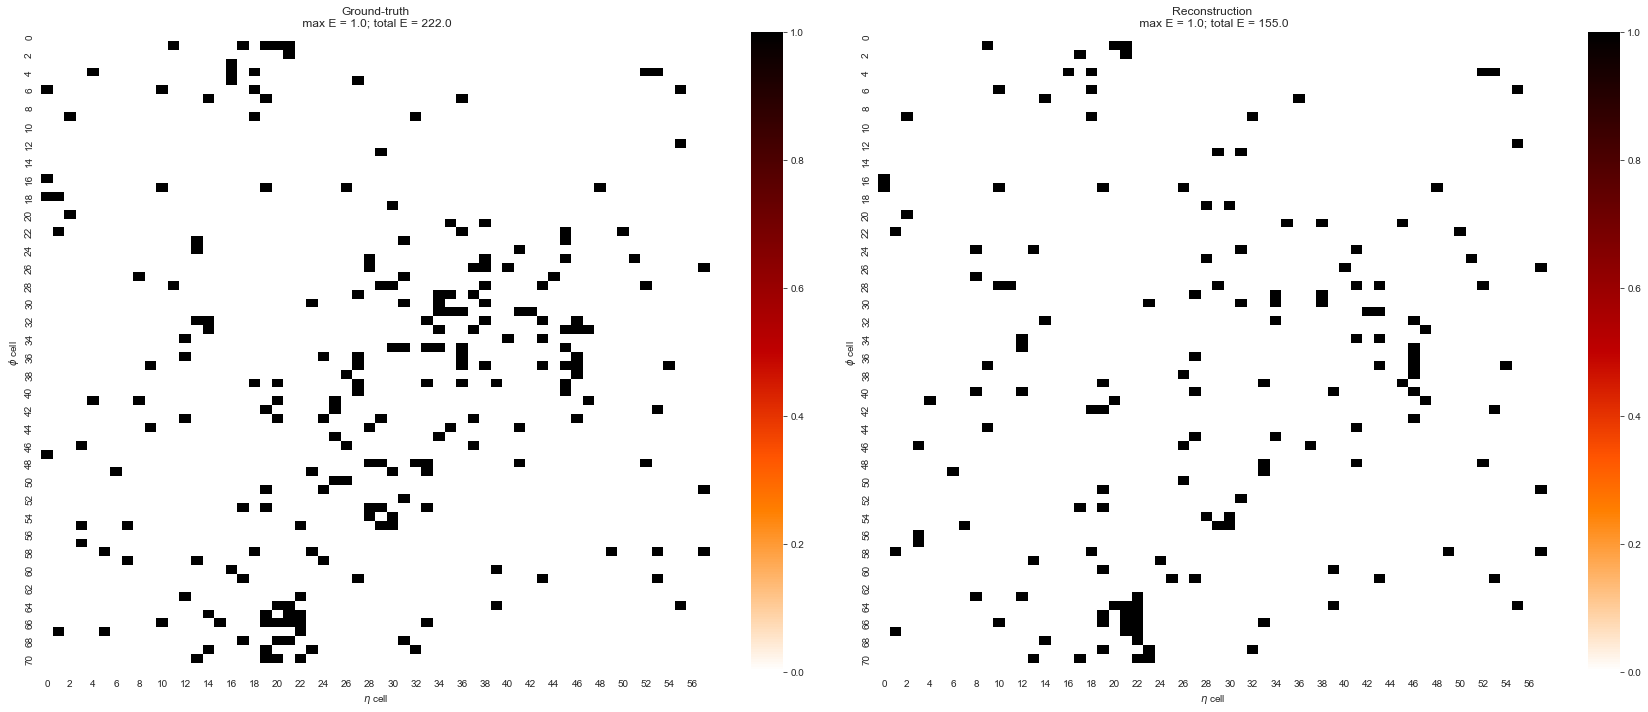

i: 53658


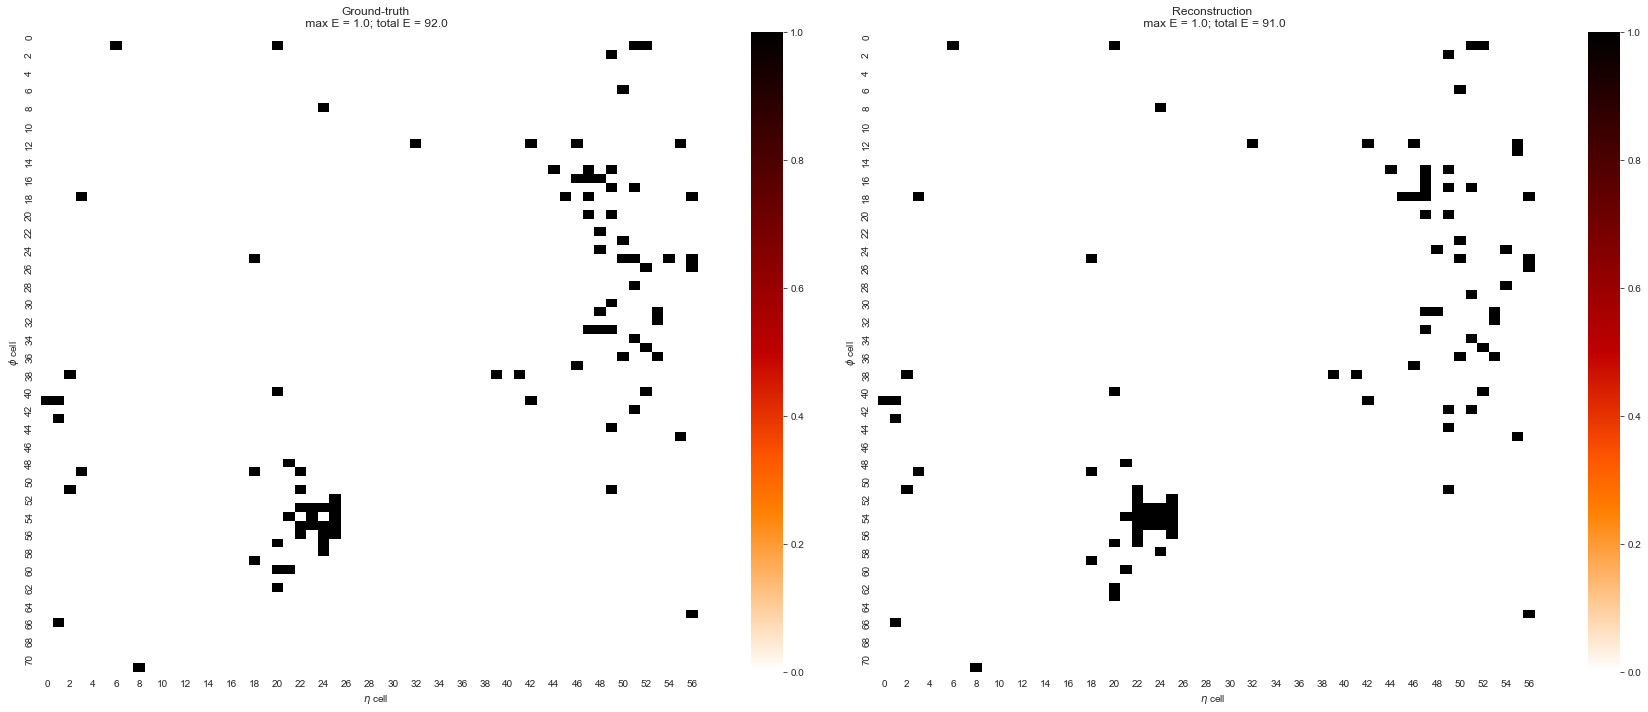

i: 49030


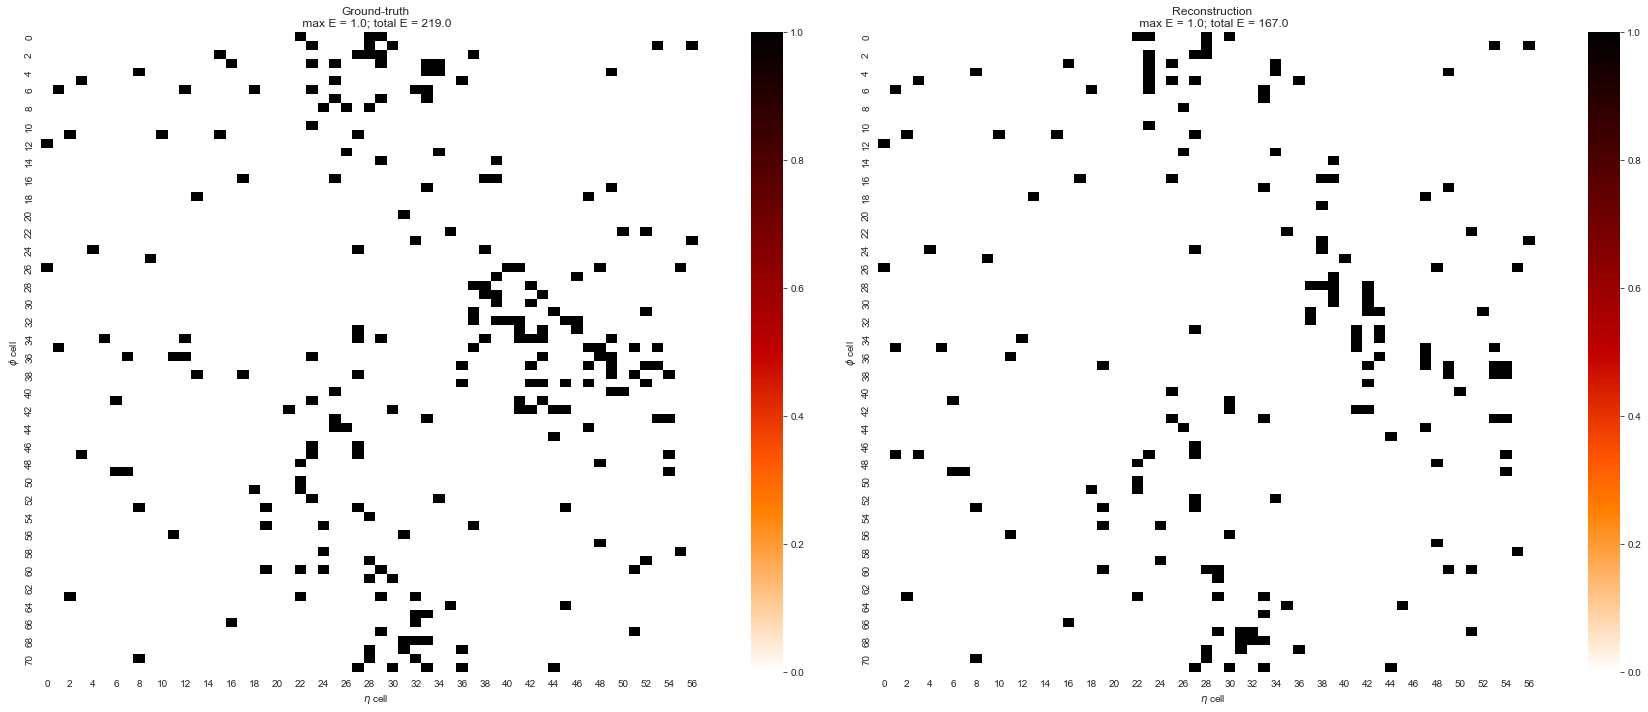

i: 64650


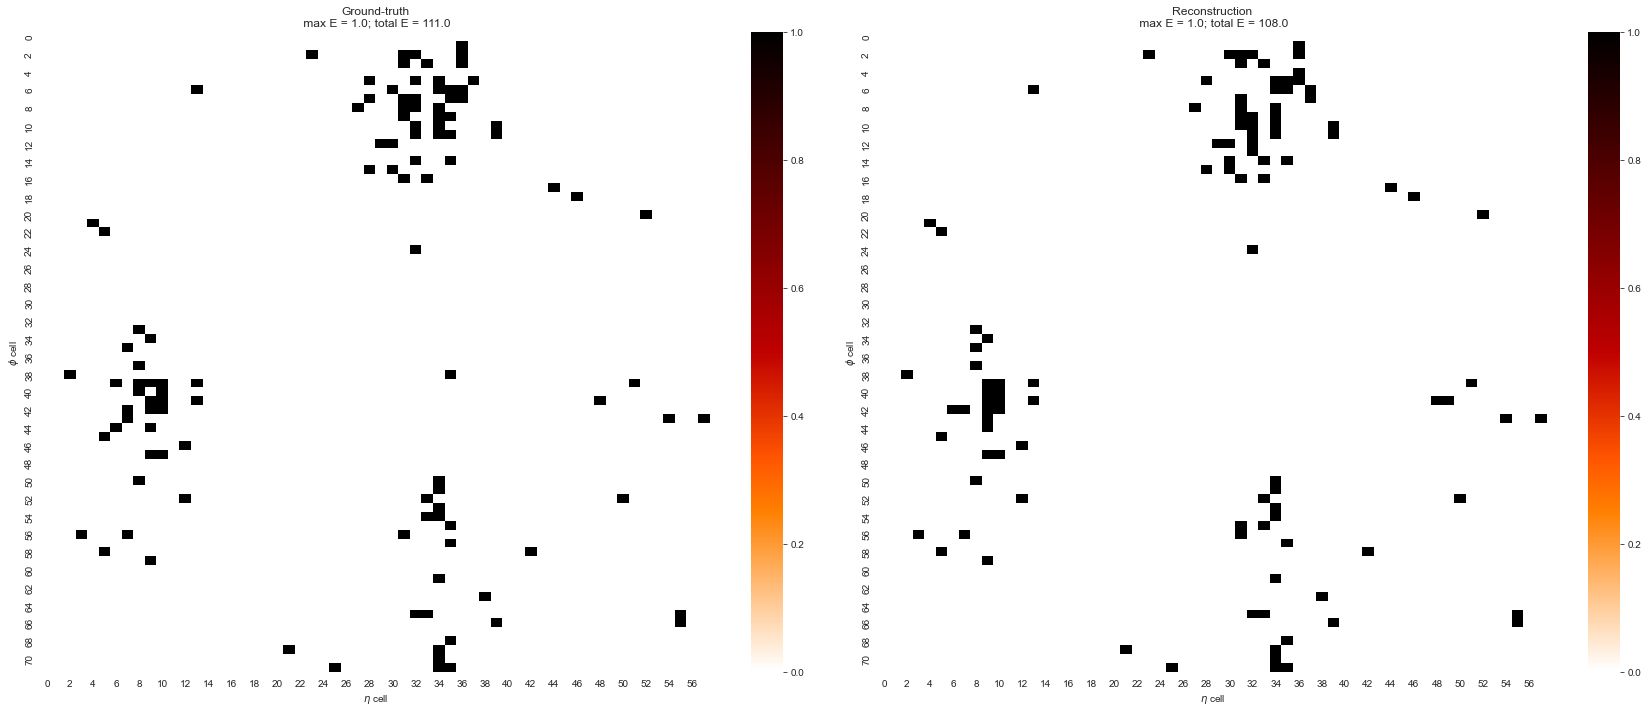

i: 8049


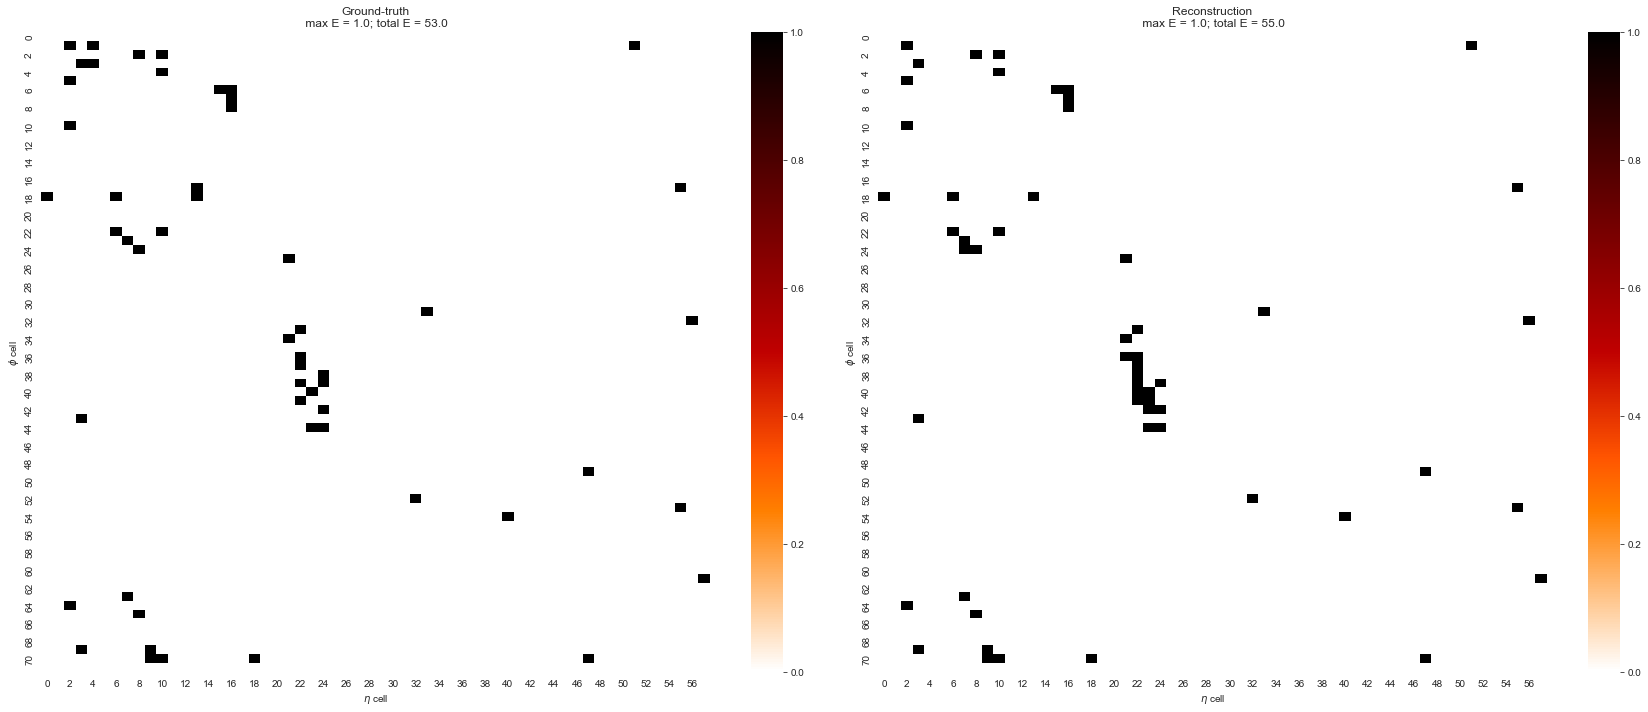

i: 65012


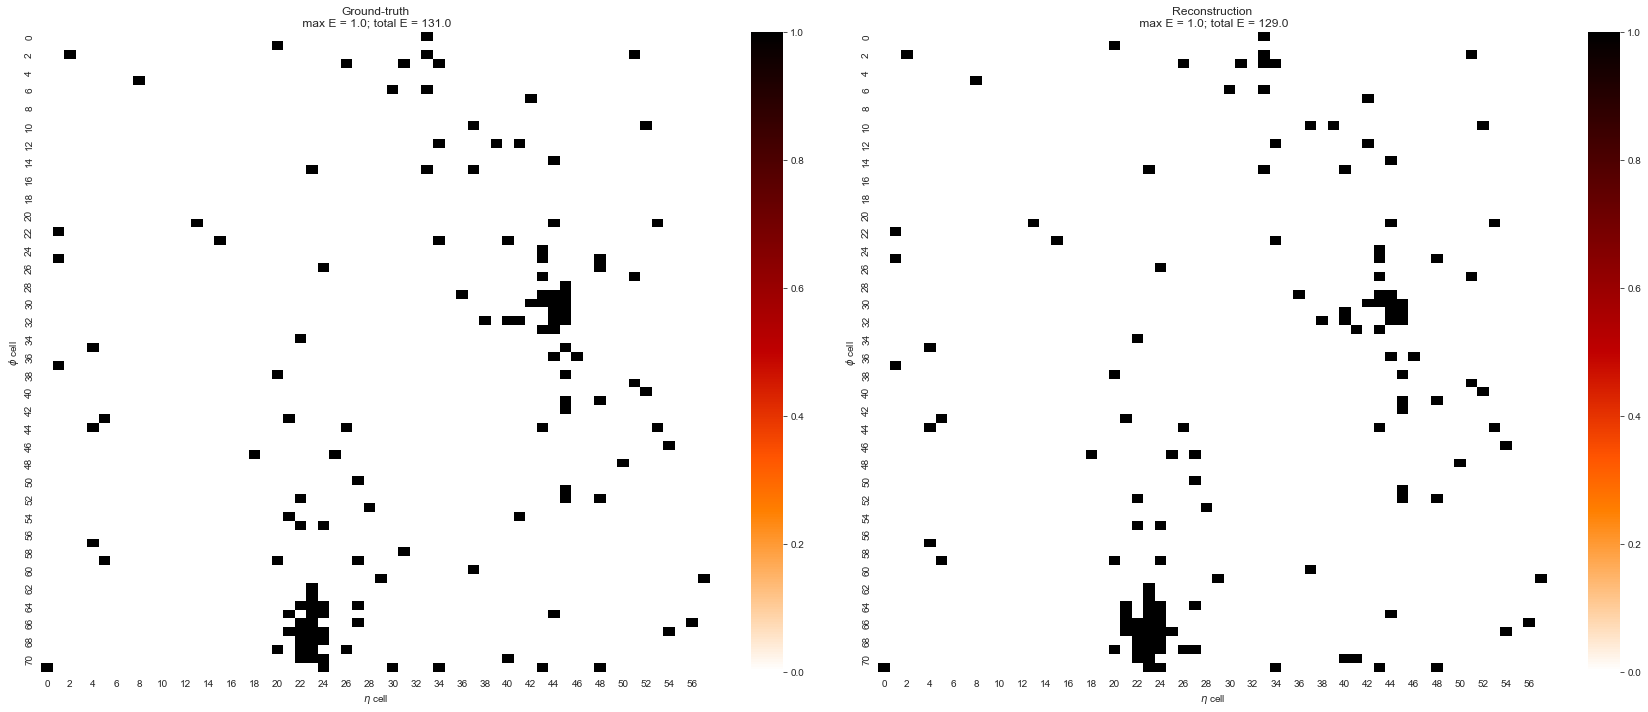

i: 23654


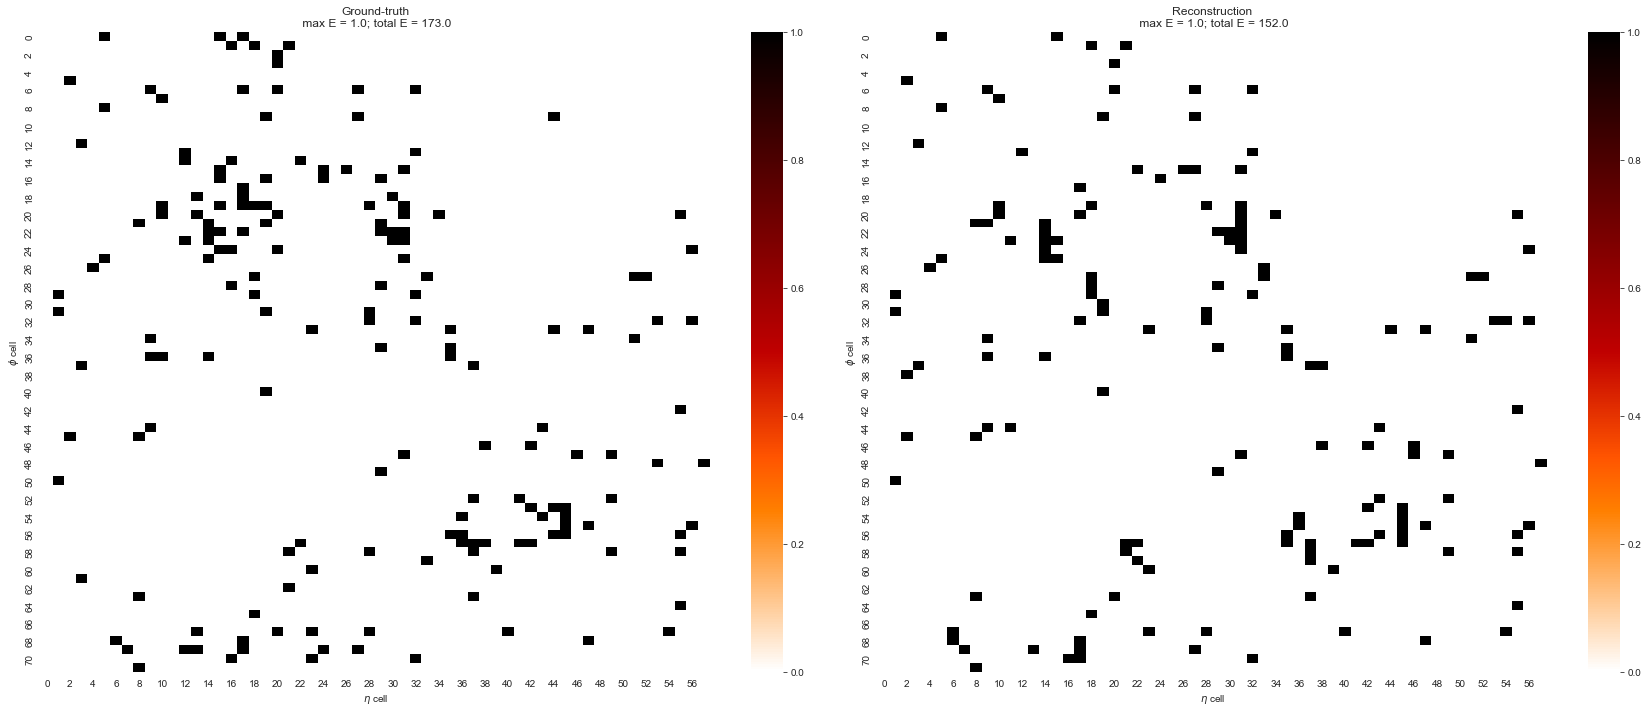

i: 32818


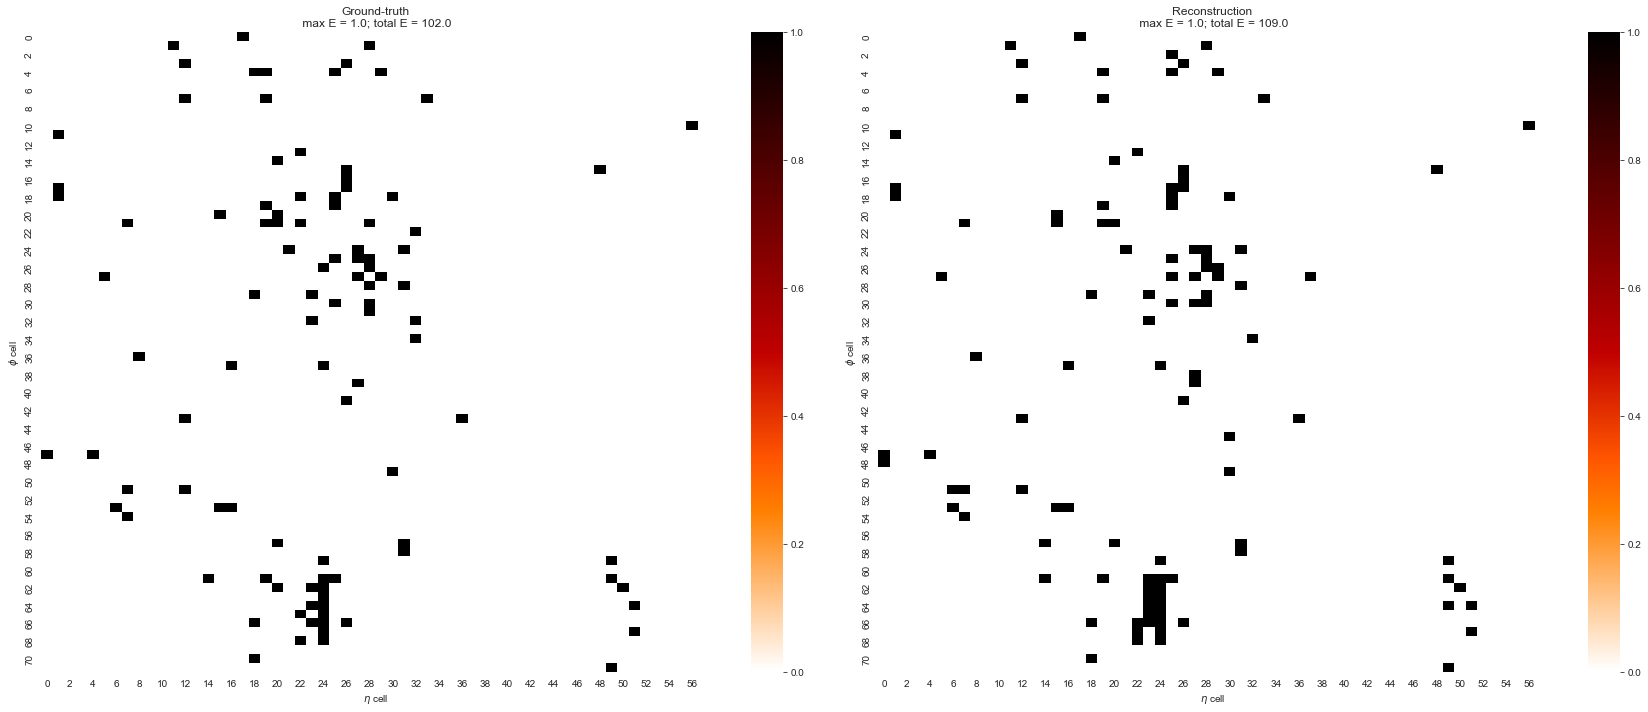

i: 24615


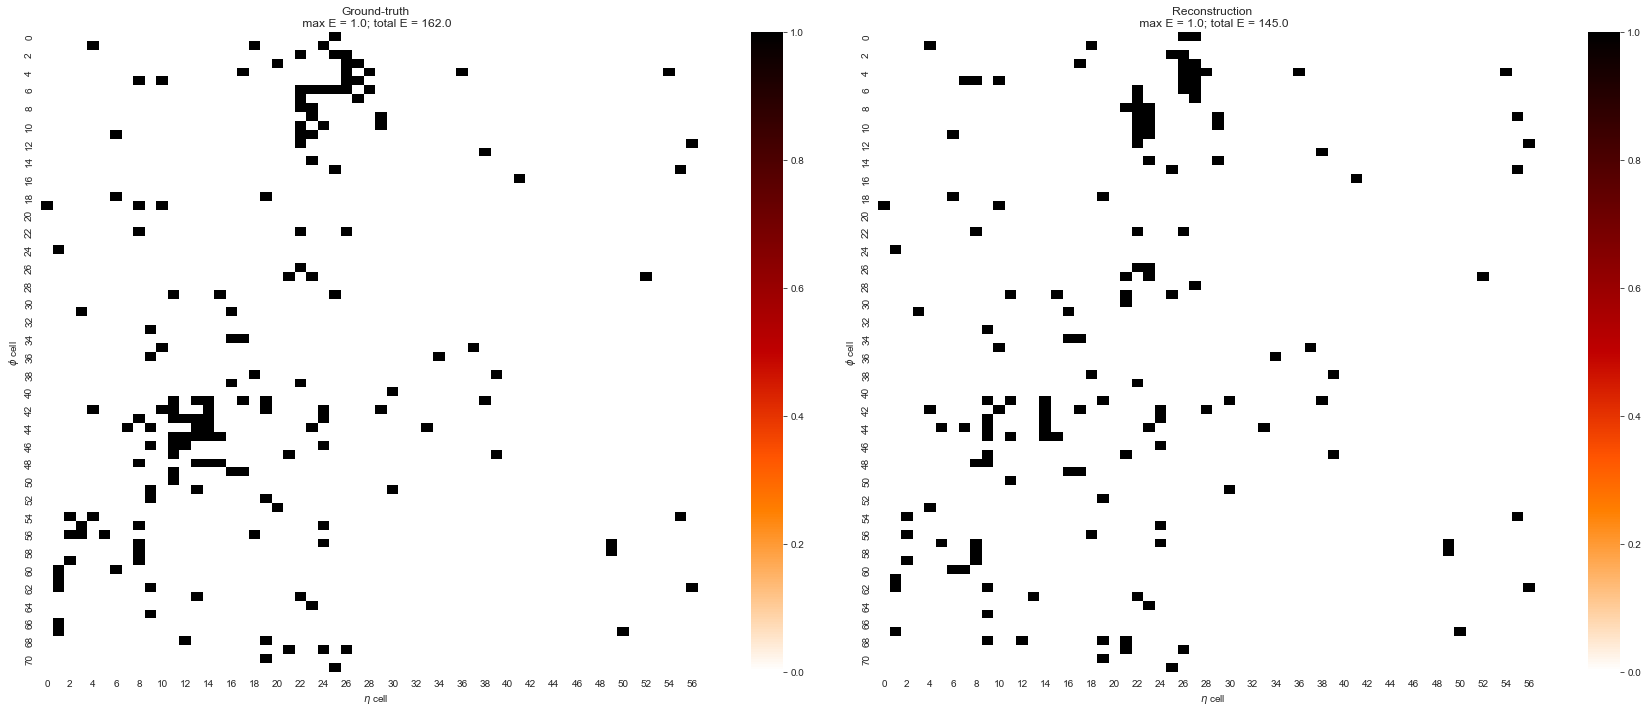

In [25]:
for _ in range(10):
    ad.plot.compare(x_mask, y_pred, cmap=ad.plot.CMAP2, v_max=1.0)

Generate and inspect samples

In [26]:
idx1 = np.random.choice(len(x_mask), size=256, replace=False)
idx2 = np.random.choice(len(x_mask), size=256, replace=False)

z_m1 = vae.mask_encoder(x_mask[idx1])
z_m2 = vae.mask_encoder(x_mask[idx2])

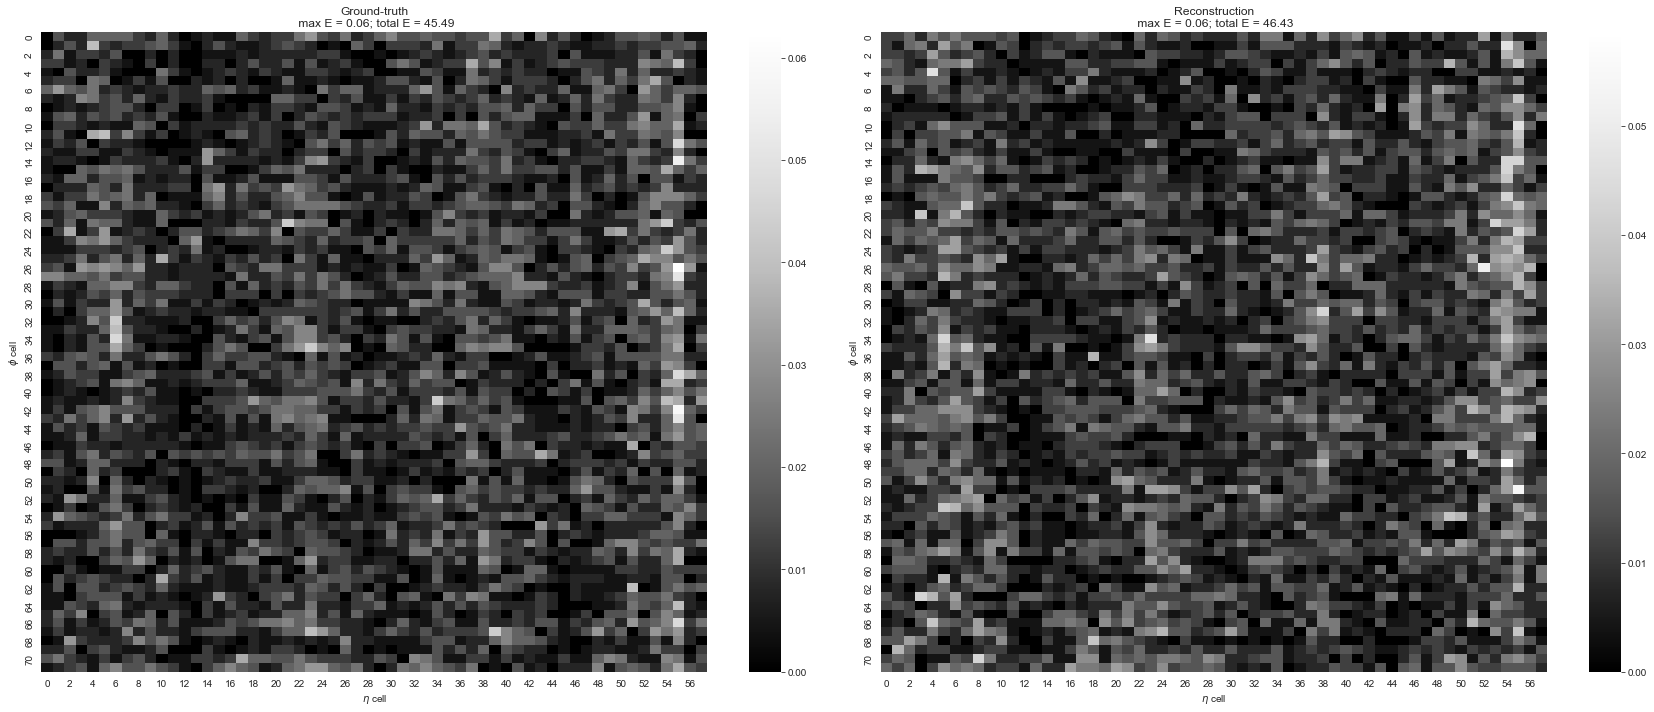

In [27]:
# generate samples
x_gen1 = np.array(vae.decoder([vae.prior.sample(256), z_m1]).mode())
x_gen2 = np.array(vae.decoder([vae.prior.sample(256), z_m2]).mode())

ad.plot.compare(x_gen2.mean(0), x_gen1.mean(0), cmap=ad.plot.CMAP3, v_max=None)

i: 41


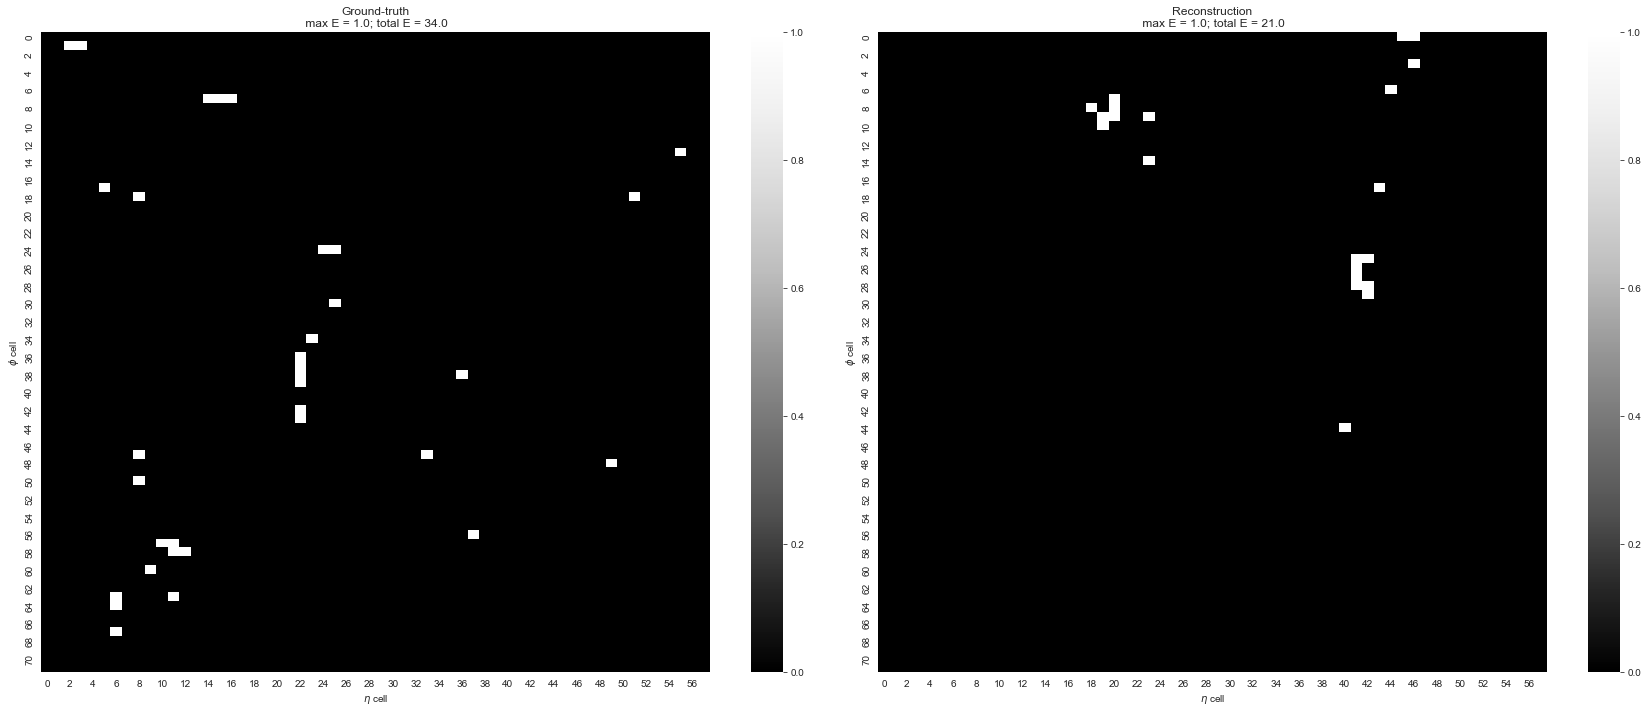

i: 202


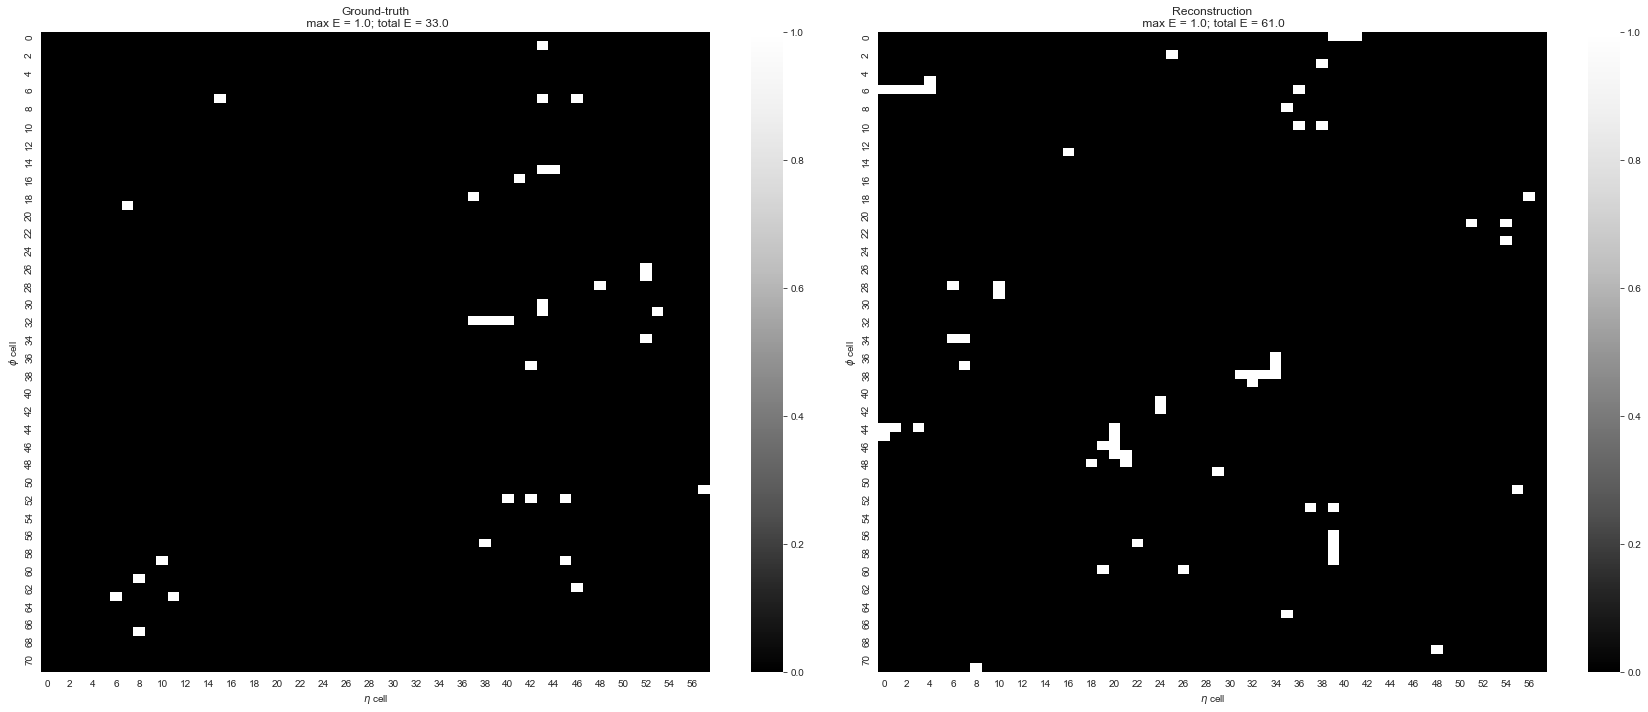

i: 1


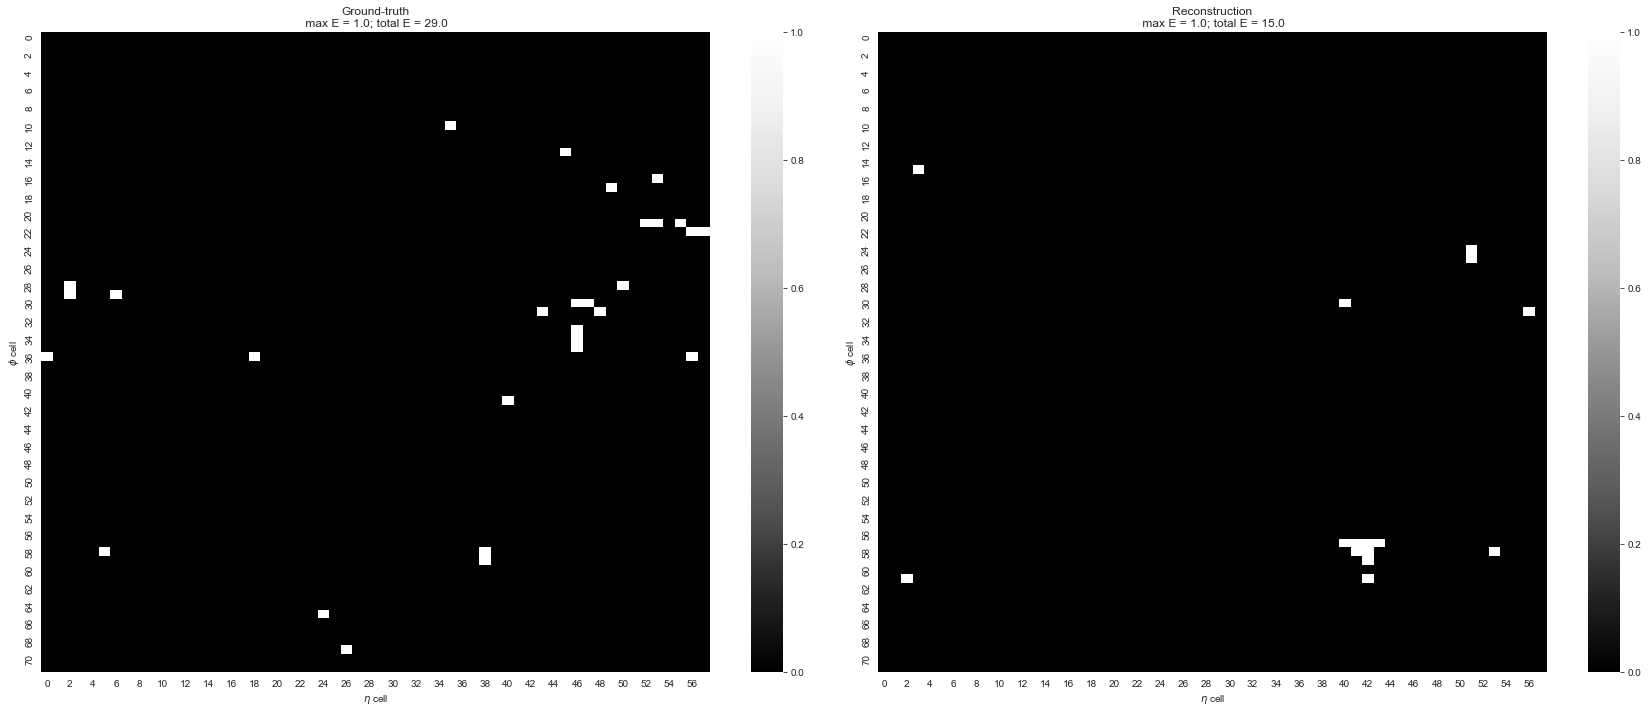

i: 151


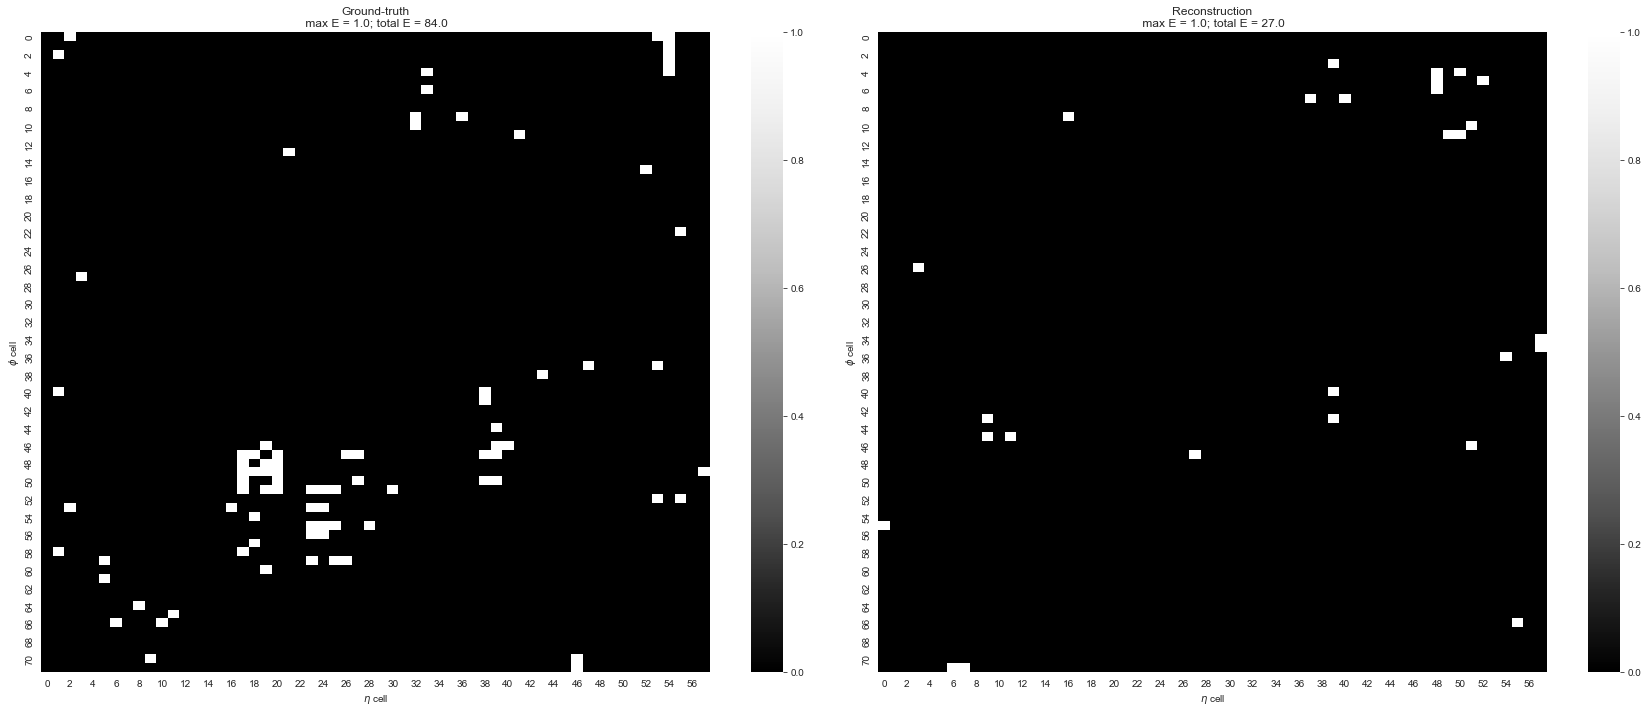

i: 87


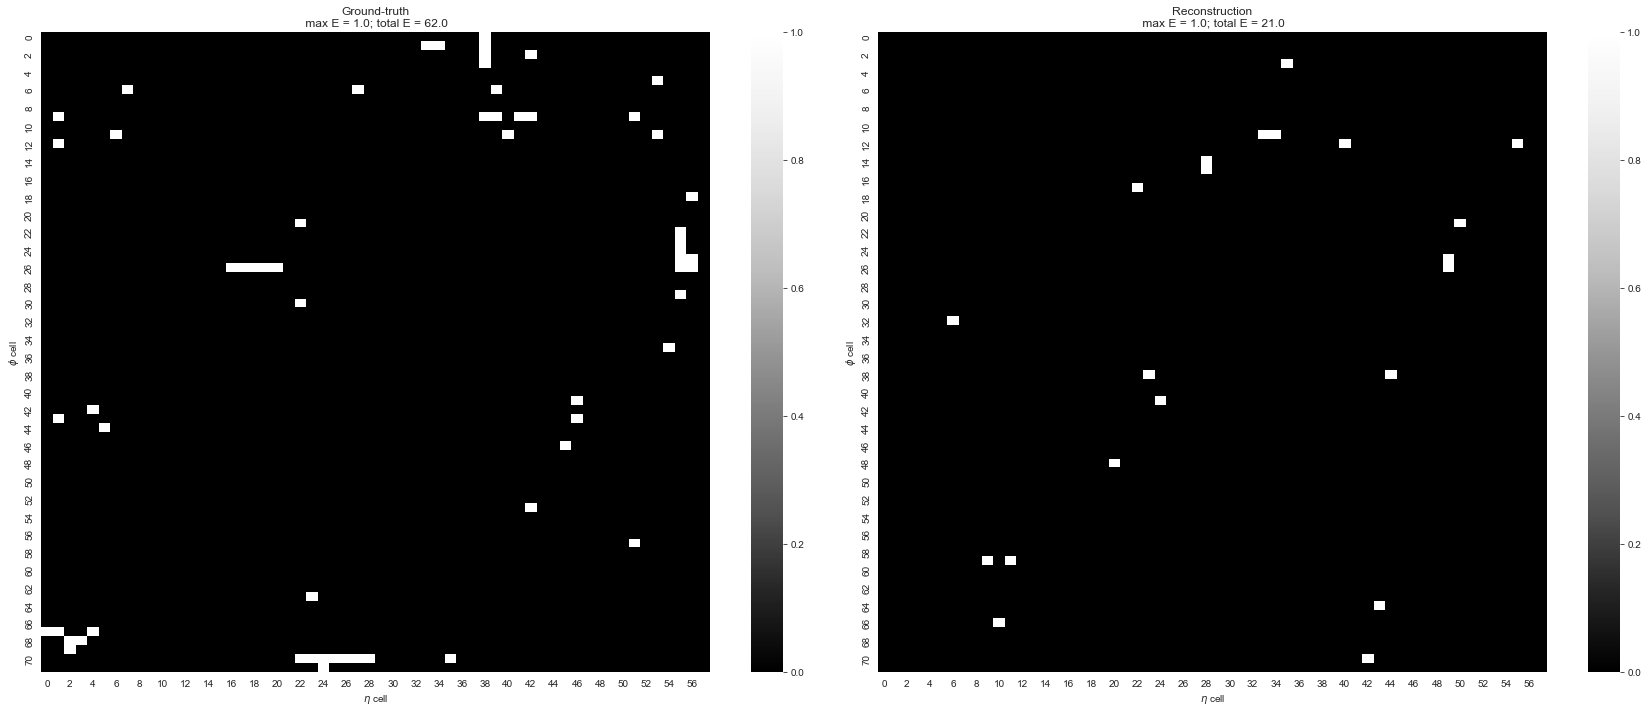

i: 191


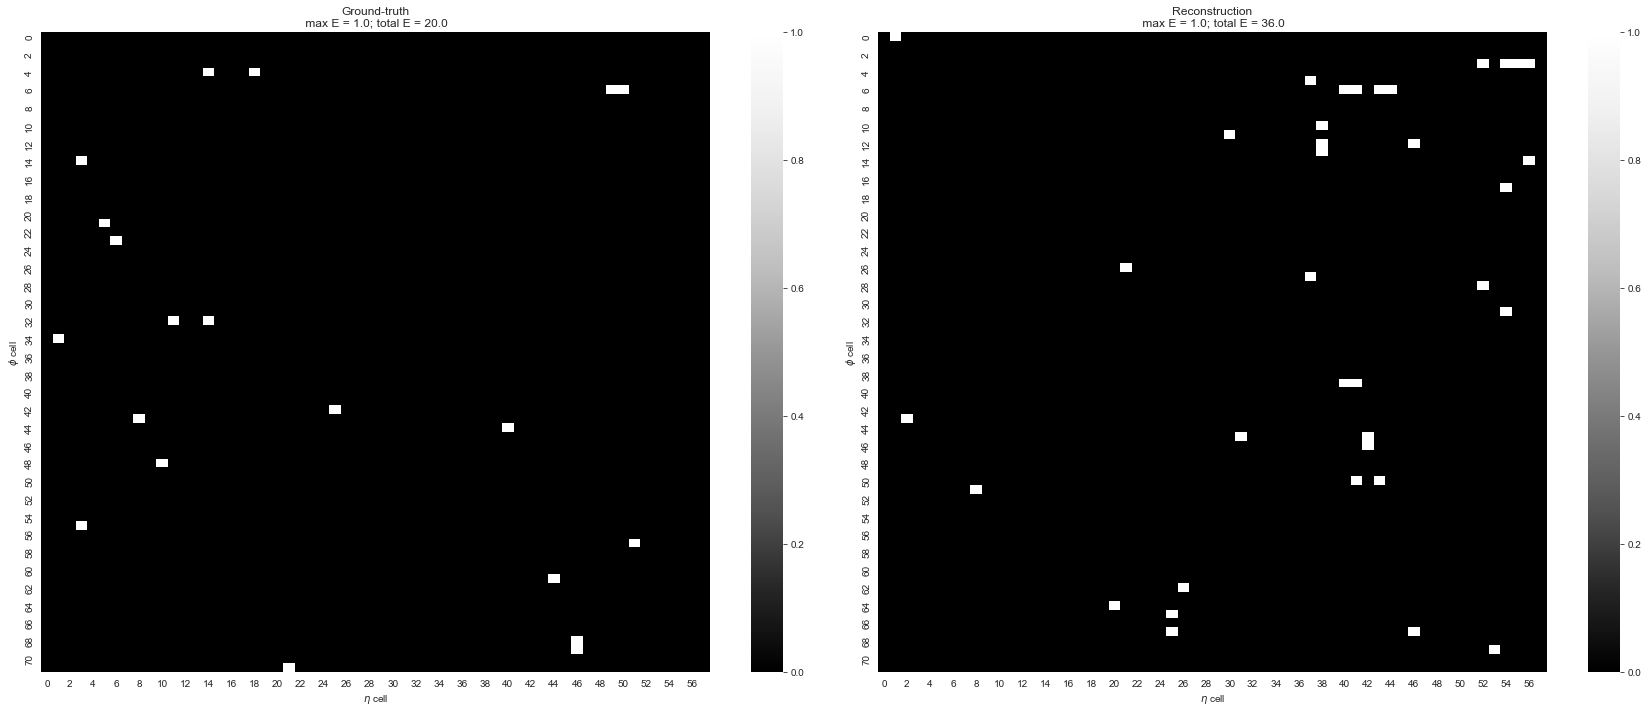

i: 86


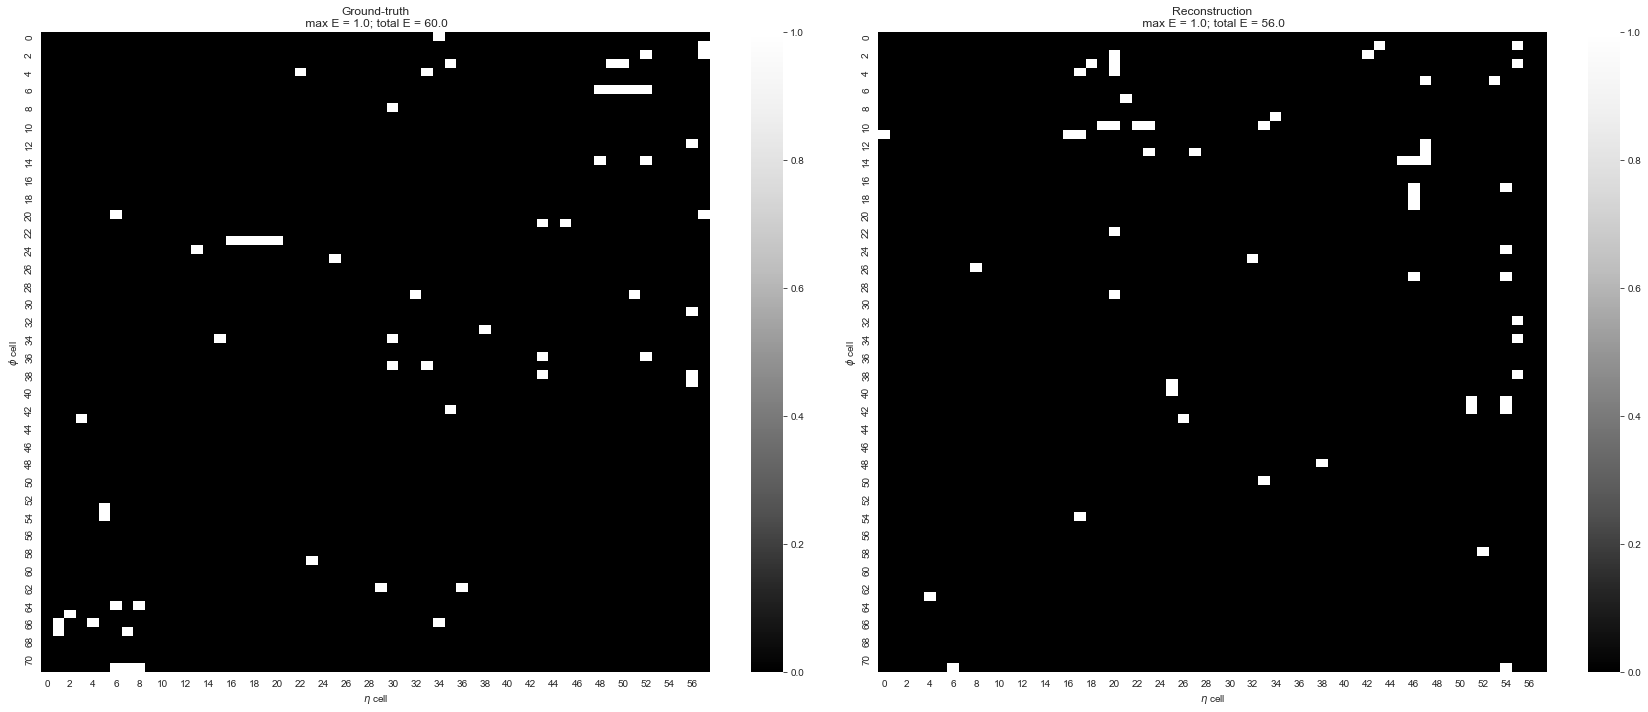

i: 191


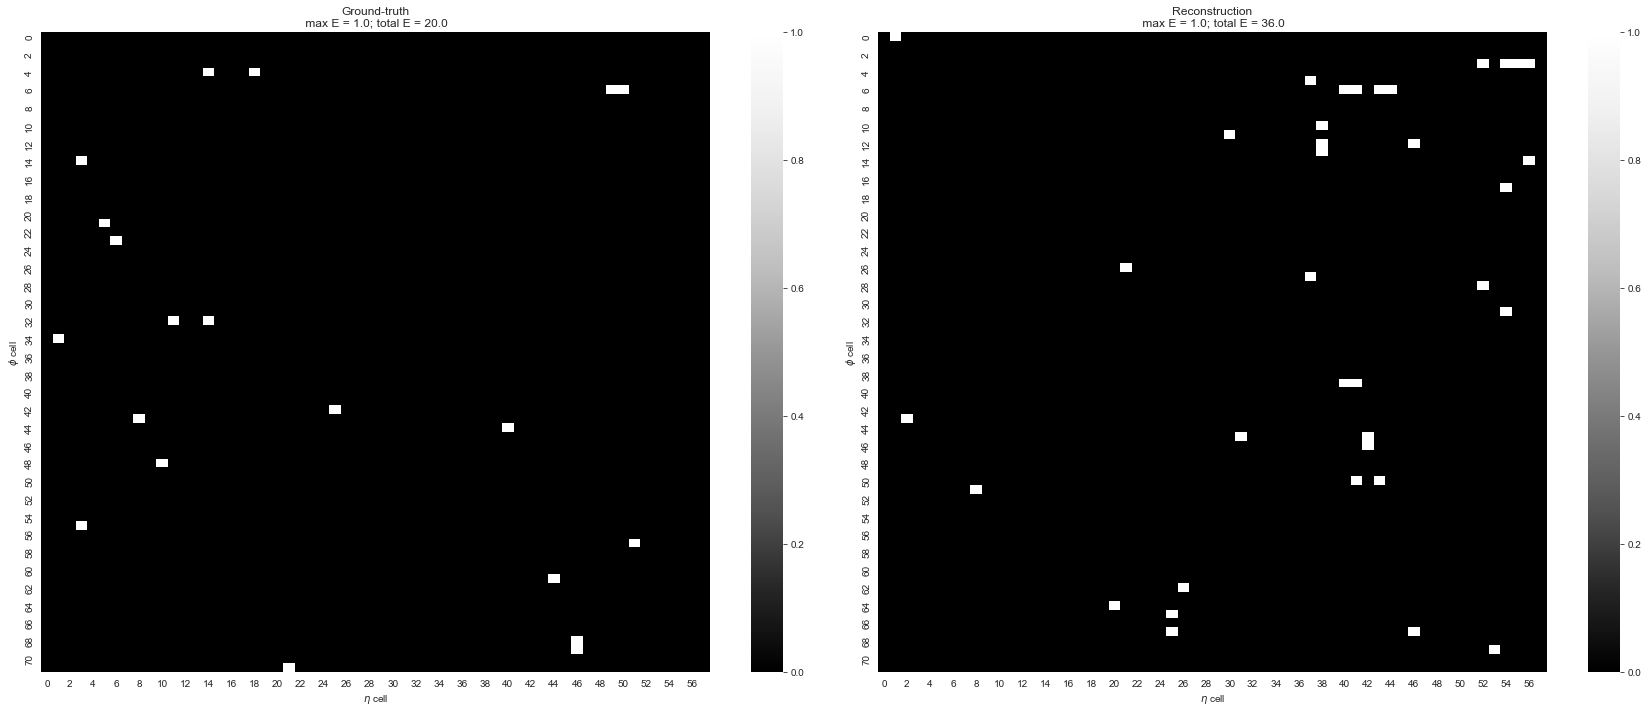

i: 98


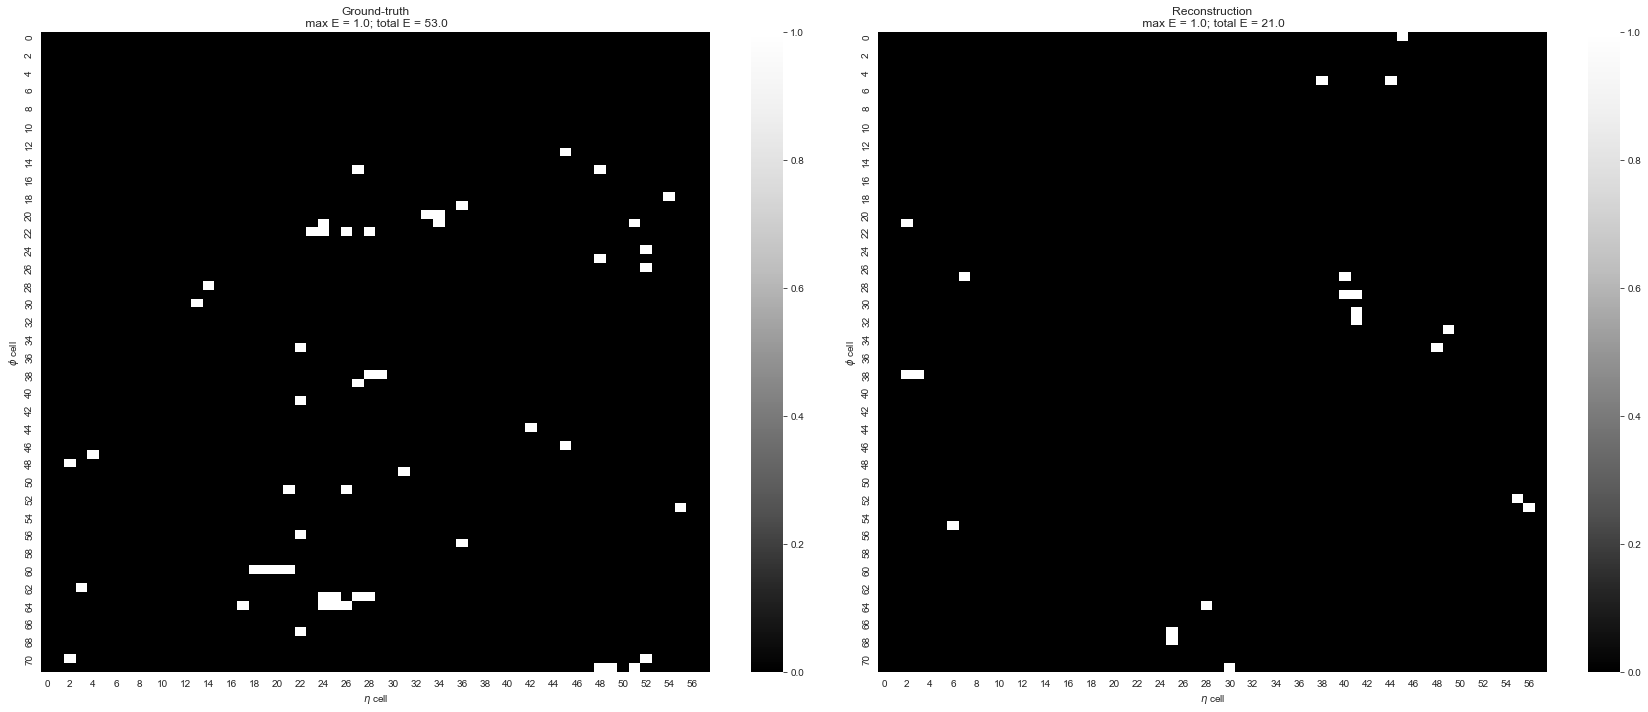

i: 48


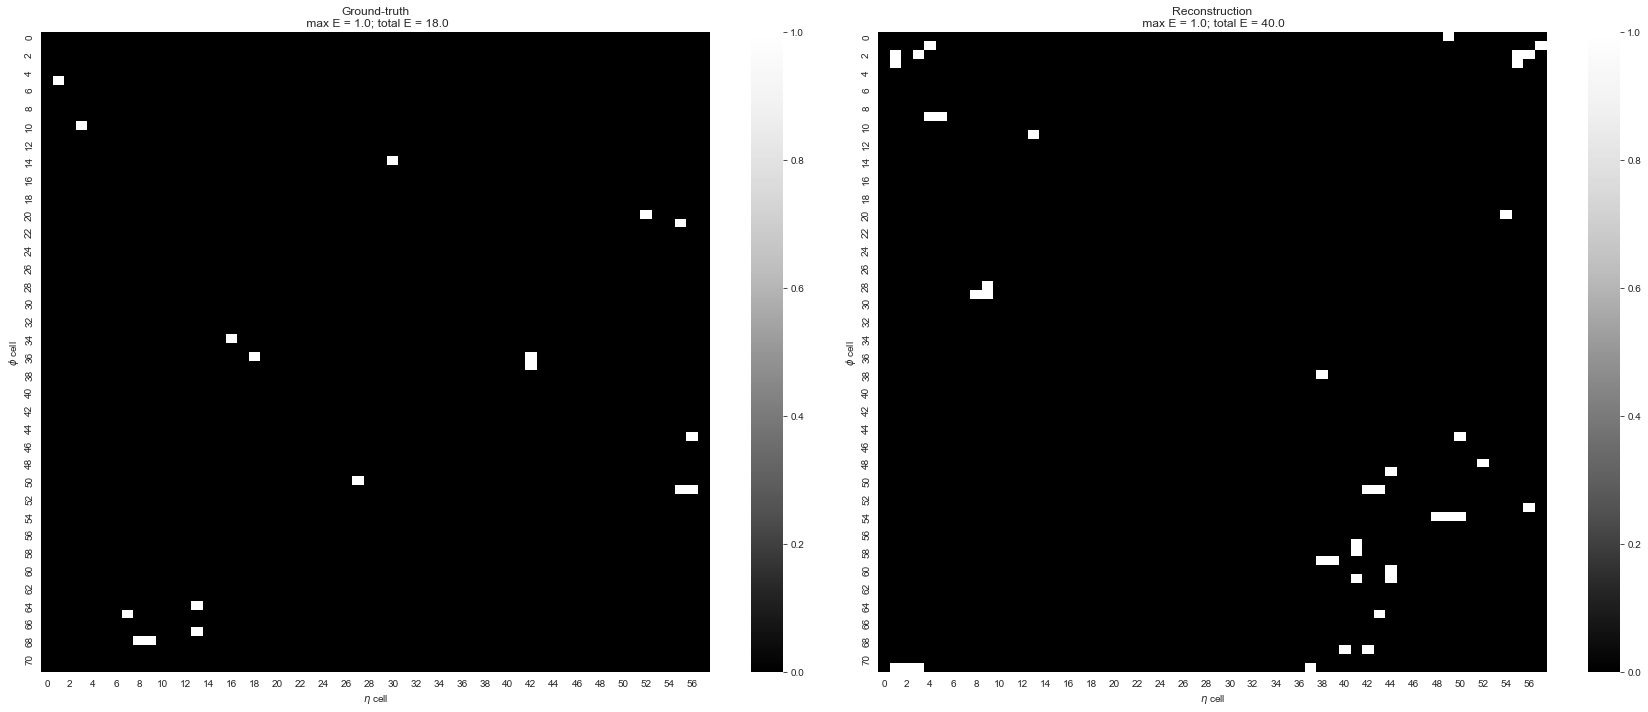

In [28]:
for _ in range(10):
    ad.plot.compare(x_gen1, x_gen2, cmap=ad.plot.CMAP3, v_max=1.0)

Auxiliary Latent Space

In [29]:
z = vae.mask_encoder.predict(x_mask, batch_size=256)
z_l2 = tf.math.l2_normalize(z, axis=-1).numpy()

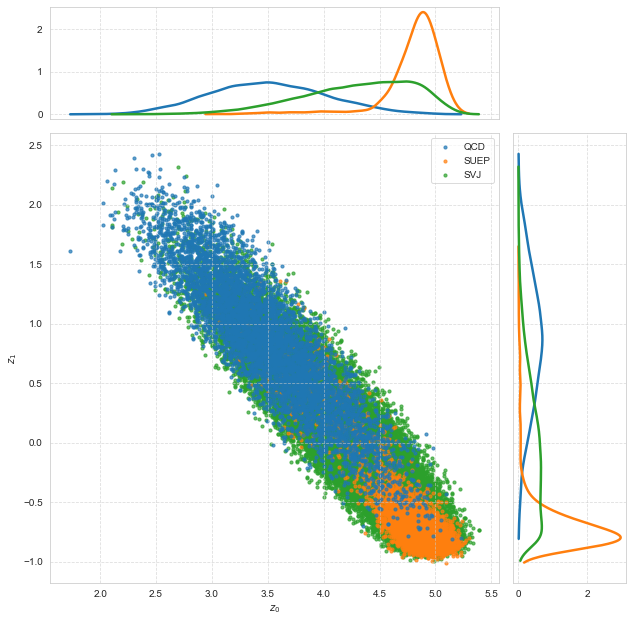

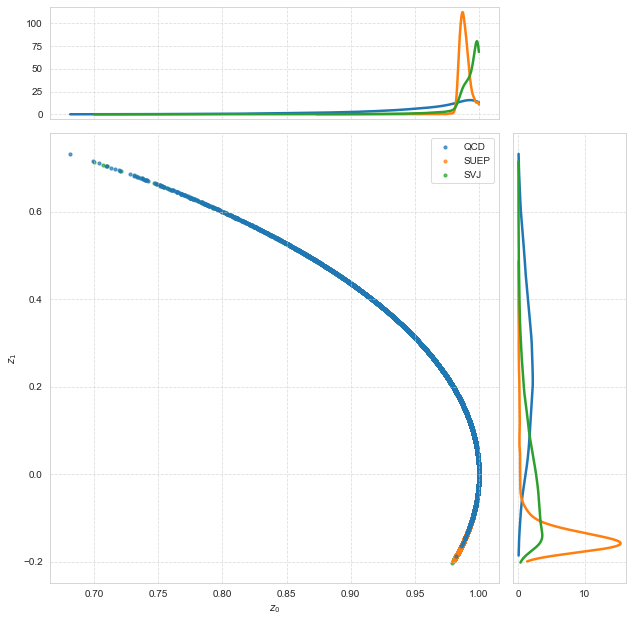

In [30]:
ad.plot.latent_kde(z, y=y_test)
ad.plot.latent_kde(z_l2, y=y_test)